In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install keras

In [3]:
import tensorflow as tf
import keras
from keras import backend as K
print(tf.__version__)
print(keras.__version__)
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, SeparableConv2D
from keras.layers.advanced_activations import LeakyReLU
from keras import regularizers
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization

2.2.0
2.4.3


In [4]:
from sklearn.metrics import f1_score

In [5]:
import optuna

In [6]:
hf_train_phi0_0 = h5py.File('/home/other/signals/data/train_phi0_0.hdf5', 'r')
hf_test_phi0_0 = h5py.File('/home/other/signals/data/test_phi0_0.hdf5', 'r')

hf_train_phi0_random = h5py.File('/home/other/signals/data/train_phi0_random.hdf5', 'r')
hf_test_phi0_random = h5py.File('/home/other/signals/data/test_phi0_random.hdf5', 'r')

# hf_train_phi0_0.keys()

In [7]:
X_train_phi0_0 = np.array(hf_train_phi0_0.get('X'))
Y_train_phi0_0 = np.array(hf_train_phi0_0.get('Y'))
dispersia_train_phi0_0 = np.array(hf_train_phi0_0.get('dispersia'))

X_train_phi0_0.shape, X_train_phi0_0[0].shape, Y_train_phi0_0.shape, dispersia_train_phi0_0.shape

((12030000, 256), (256,), (12030000,), (12030000,))

In [8]:
X_test_phi0_0 = np.array(hf_test_phi0_0.get('X'))
Y_test_phi0_0 = np.array(hf_test_phi0_0.get('Y'))
dispersia_test_phi0_0 = np.array(hf_test_phi0_0.get('dispersia'))

X_test_phi0_0.shape, X_test_phi0_0[0].shape, Y_test_phi0_0.shape, dispersia_test_phi0_0.shape

((6015000, 256), (256,), (6015000,), (6015000,))

In [9]:
X_train_phi0_random = np.array(hf_train_phi0_random.get('X'))
Y_train_phi0_random = np.array(hf_train_phi0_random.get('Y'))
dispersia_train_phi0_random = np.array(hf_train_phi0_random.get('dispersia'))

X_train_phi0_random.shape, X_train_phi0_random[0].shape, Y_train_phi0_random.shape, dispersia_train_phi0_random.shape

((12030000, 256), (256,), (12030000,), (12030000,))

In [10]:
X_test_phi0_random = np.array(hf_test_phi0_random.get('X'))
Y_test_phi0_random = np.array(hf_test_phi0_random.get('Y'))
dispersia_test_phi0_random = np.array(hf_test_phi0_random.get('dispersia'))

X_test_phi0_random.shape, X_test_phi0_random[0].shape, Y_test_phi0_random.shape, dispersia_test_phi0_random.shape

((6015000, 256), (256,), (6015000,), (6015000,))

In [11]:
# !pip install keras

# Conv1D

In [12]:
weight_decay = 1e-4
initializer='glorot_normal'

In [13]:
from tensorflow.keras import optimizers

INIT_LR = 5e-3

## for data with phi0 == 0

In [14]:
X_train_phi0_0.shape

(12030000, 256)

In [15]:
#X_train_phi0_0 = X_train_phi0_0.reshape((X_train_phi0_0.shape[0], X_train_phi0_0.shape[1], 1, 1))

X_train_phi0_0 = X_train_phi0_0.reshape((X_train_phi0_0.shape[0], X_train_phi0_0.shape[1], 1))
X_test_phi0_0 = X_test_phi0_0.reshape((X_test_phi0_0.shape[0], X_test_phi0_0.shape[1], 1))
X_train_phi0_random = X_train_phi0_random.reshape((X_train_phi0_random.shape[0], X_train_phi0_random.shape[1], 1))
X_test_phi0_random = X_test_phi0_random.reshape((X_test_phi0_random.shape[0], X_test_phi0_random.shape[1], 1))
X_train_phi0_0.shape, X_test_phi0_0.shape, X_train_phi0_random.shape, X_test_phi0_random.shape

((12030000, 256, 1), (6015000, 256, 1), (12030000, 256, 1), (6015000, 256, 1))

In [16]:
Y_train_phi0_0 = Y_train_phi0_0.reshape((Y_train_phi0_0.shape[0], 1))
Y_test_phi0_0 = Y_test_phi0_0.reshape((Y_test_phi0_0.shape[0], 1))
Y_train_phi0_random = Y_train_phi0_random.reshape((Y_train_phi0_random.shape[0], 1))
Y_test_phi0_random = Y_test_phi0_random.reshape((Y_test_phi0_random.shape[0], 1))
Y_train_phi0_0.shape, Y_test_phi0_0.shape, Y_train_phi0_random.shape, Y_test_phi0_random.shape

((12030000, 1), (6015000, 1), (12030000, 1), (6015000, 1))

In [17]:
Y_train_phi0_0_cat = tf.keras.utils.to_categorical(Y_train_phi0_0, num_classes=3, dtype='float32')
Y_test_phi0_0_cat = tf.keras.utils.to_categorical(Y_test_phi0_0, num_classes=3, dtype='float32')
Y_train_phi0_random_cat = tf.keras.utils.to_categorical(Y_train_phi0_random, num_classes=3, dtype='float32')
Y_test_phi0_random_cat = tf.keras.utils.to_categorical(Y_test_phi0_random, num_classes=3, dtype='float32')

Y_train_phi0_0_cat.shape, Y_test_phi0_0_cat.shape, Y_train_phi0_random_cat.shape, Y_test_phi0_random_cat.shape

((12030000, 3), (6015000, 3), (12030000, 3), (6015000, 3))

In [18]:
Y_train_phi0_0_cat

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [19]:
# from keras import backend
# backend.set_image_data_format('channels_last')

In [20]:
from sklearn.model_selection import train_test_split

X_train_split_phi0_0, X_val_split_phi0_0, y_train_split_phi0_0, y_val_split_phi0_0 = train_test_split(X_train_phi0_0, Y_train_phi0_0_cat, test_size=0.33, random_state=42)

In [22]:
filters = [8, 16, 32, 40, 48, 56, 64, 72, 80, 88, 96]
# filters = [8, 16]
# predictions1 = []
df1 = pd.DataFrame(columns=['y_true', 'y_pred', 'disp'])
df1['y_true'] = Y_test_phi0_0.T[0]
df1['disp'] = dispersia_test_phi0_0
f1_dict_phi0_0_all_conv1d = dict()
for filt in filters:
    model1 = Sequential()
    model1.add(Conv1D(filters=filt, 
                      kernel_size=3, 
                      activation='relu',
                      kernel_initializer=initializer, 
                      input_shape=(256, 1)))
    model1.add(Flatten())
    model1.add(Dense(3, activation="softmax"))
    
    model1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    
    history1 = model1.fit(x=X_train_phi0_0, y=Y_train_phi0_0_cat,
                          batch_size=256,
                          epochs=4,
#                           batch_size=25600,
#                           epochs=1,
                          shuffle=True,
                          verbose=1,
                          initial_epoch=0)
    pred1 = model1.predict_classes(X_test_phi0_0)
#     predictions1.append()
    df1['y_pred_filt_{}'.format(filt)] = pred1
    
    #for filt in filters:
    f1_dict_phi0_0_all_conv1d[filt] = dict() 
    for s in df1['disp'].unique():
        df = df1[df1['disp'] == s]
        f1_dict_phi0_0_all_conv1d[filt][s] = f1_score(df1['y_true'].values, 
                                                      df1['y_pred_filt_{}'.format(filt)].values, 
                                                      average='micro')
    # print(f1_dict_phi0_0_all_conv1d)

Epoch 1/4
46993/46993 [==============================] - 250s 5ms/step - loss: 0.3016 - accuracy: 0.8574
Epoch 2/4
46993/46993 [==============================] - 196s 4ms/step - loss: 0.2923 - accuracy: 0.8587
Epoch 3/4
46993/46993 [==============================] - 188s 4ms/step - loss: 0.2923 - accuracy: 0.8588
Epoch 4/4
46993/46993 [==============================] - 193s 4ms/step - loss: 0.2923 - accuracy: 0.8587
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Epoch 1/4
46993/46993 [==============================] - 230s 5ms/step - loss: 0.3018 - accuracy: 0.8572
Epoch 2/4
46993/46993 [==============================] - 186s 4ms/step - loss: 0.2915 - accuracy: 0.8586
Epoch 3/4
46993/46993 [=============

In [23]:
# f1_dict_phi0_0_all_conv1d

In [24]:
# f1_dict_phi0_0_all_conv1d = dict()
# for s in df1['disp'].unique():
#     df = df1[df1['disp'] == s]
#     f1_dict_phi0_0_all_conv1d[s] = dict() 
#     for filt in filters:
#         f1_dict_phi0_0_all_conv1d[s][filt] = f1_score(df1['y_true'].values, 
#                                                       df1['y_pred_filt_{}'.format(filt)].values, 
#                                                       average='micro')

In [25]:
# f1_dict_phi0_0_all_conv1d[8]

Text(0, 0.5, 'F1-мера')

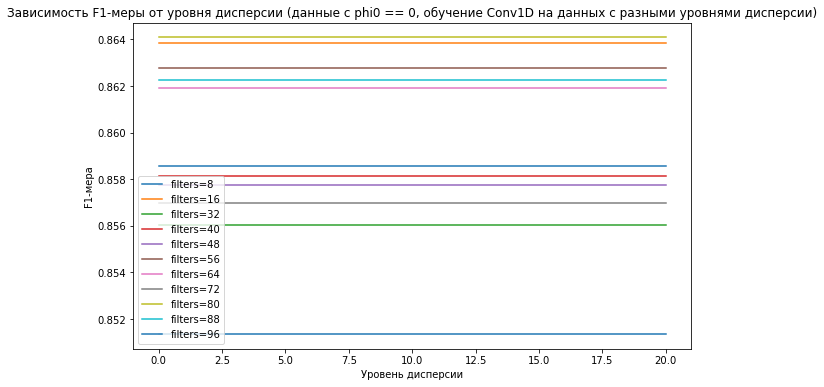

In [26]:
plt.figure(figsize=(10, 6))
for filt in f1_dict_phi0_0_all_conv1d.keys():
    plt.plot(list(f1_dict_phi0_0_all_conv1d[filt].keys()), list(f1_dict_phi0_0_all_conv1d[filt].values()), label='filters='+str(filt))
plt.legend()
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение Conv1D на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')

In [21]:
kernels = [i for i in range(2, 11)]
df2 = pd.DataFrame(columns=['y_true', 'y_pred', 'disp'])
df2['y_true'] = Y_test_phi0_0.T[0]
df2['disp'] = dispersia_test_phi0_0
f1_dict_phi0_0_all_conv1d = dict()
for kernel in kernels:
    model1 = Sequential()
    model1.add(Conv1D(filters=80, 
                      kernel_size=kernel, 
                      activation='relu',
                      kernel_initializer=initializer, 
                      input_shape=(256, 1)))
    model1.add(Flatten())
    model1.add(Dense(3, activation="softmax"))
    
    model1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    
    history1 = model1.fit(x=X_train_phi0_0, y=Y_train_phi0_0_cat,
                          batch_size=256,
                          epochs=4,
#                           batch_size=25600,
#                           epochs=1,
                          shuffle=True,
                          verbose=1,
                          initial_epoch=0)
    pred1 = model1.predict_classes(X_test_phi0_0)
#     predictions1.append()
    df2['y_pred_kernel_{}'.format(kernel)] = pred1
    
    #for filt in filters:
    f1_dict_phi0_0_all_conv1d[kernel] = dict() 
    for s in df2['disp'].unique():
        df = df2[df2['disp'] == s]
        f1_dict_phi0_0_all_conv1d[kernel][s] = f1_score(df2['y_true'].values, 
                                                        df2['y_pred_kernel_{}'.format(kernel)].values, 
                                                        average='micro')
    # print(f1_dict_phi0_0_all_conv1d)

Epoch 1/4
46993/46993 [==============================] - 209s 4ms/step - loss: 0.3055 - accuracy: 0.8572
Epoch 2/4
46993/46993 [==============================] - 182s 4ms/step - loss: 0.2951 - accuracy: 0.8583
Epoch 3/4
46993/46993 [==============================] - 181s 4ms/step - loss: 0.2944 - accuracy: 0.8584
Epoch 4/4
46993/46993 [==============================] - 181s 4ms/step - loss: 0.2945 - accuracy: 0.8584
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Epoch 1/4
46993/46993 [==============================] - 218s 5ms/step - loss: 0.3017 - accuracy: 0.8573
Epoch 2/4
46993/46993 [==============================] - 182s 4ms/step - loss: 0.2916 - accuracy: 0.8587
Epoch 3/4
46993/46993 [=============

Text(0, 0.5, 'F1-мера')

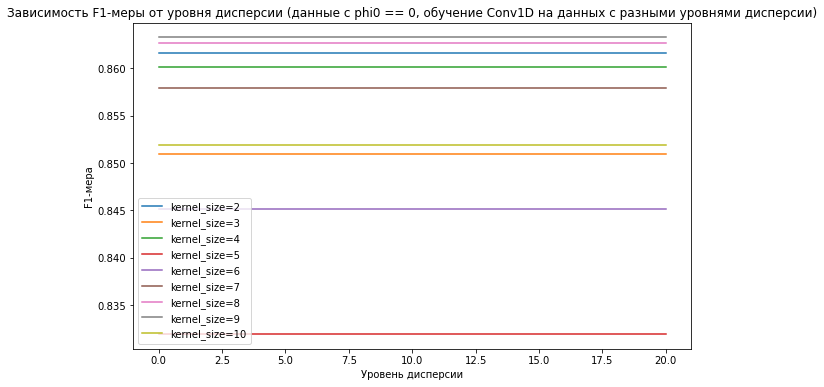

In [22]:
plt.figure(figsize=(10, 6))
for kernel in f1_dict_phi0_0_all_conv1d.keys():
    plt.plot(list(f1_dict_phi0_0_all_conv1d[kernel].keys()), list(f1_dict_phi0_0_all_conv1d[kernel].values()), label='kernel_size='+str(kernel))
plt.legend()
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение Conv1D на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')

In [22]:
activations = ["softmax", "sigmoid"]
df3 = pd.DataFrame(columns=['y_true', 'y_pred', 'disp'])
df3['y_true'] = Y_test_phi0_0.T[0]
df3['disp'] = dispersia_test_phi0_0
f1_dict_phi0_0_all_conv1d = dict()
for activation in activations:
    model1 = Sequential()
    model1.add(Conv1D(filters=80, 
                      kernel_size=9, 
                      activation='relu',
                      kernel_initializer=initializer, 
                      input_shape=(256, 1)))
    model1.add(Flatten())
    model1.add(Dense(3, activation=activation))
    
    model1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    
    history1 = model1.fit(x=X_train_phi0_0, y=Y_train_phi0_0_cat,
                          batch_size=256,
                          epochs=4,
#                           batch_size=25600,
#                           epochs=1,
                          shuffle=True,
                          verbose=1,
                          initial_epoch=0)
    pred1 = model1.predict_classes(X_test_phi0_0)
#     predictions1.append()
    df3['y_pred_activation_{}'.format(activation)] = pred1
    
    #for filt in filters:
    f1_dict_phi0_0_all_conv1d[activation] = dict() 
    for s in df3['disp'].unique():
        df = df3[df3['disp'] == s]
        f1_dict_phi0_0_all_conv1d[activation][s] = f1_score(df3['y_true'].values, 
                                                            df3['y_pred_activation_{}'.format(activation)].values, 
                                                            average='micro')
    # print(f1_dict_phi0_0_all_conv1d)

Epoch 1/4
46993/46993 [==============================] - 192s 4ms/step - loss: 0.2989 - accuracy: 0.8574
Epoch 2/4
46993/46993 [==============================] - 194s 4ms/step - loss: 0.2911 - accuracy: 0.8583
Epoch 3/4
46993/46993 [==============================] - 193s 4ms/step - loss: 0.2907 - accuracy: 0.8585
Epoch 4/4
46993/46993 [==============================] - 192s 4ms/step - loss: 0.2902 - accuracy: 0.8589
Epoch 1/4
46993/46993 [==============================] - 194s 4ms/step - loss: 0.2804 - accuracy: 0.8650
Epoch 2/4
46993/46993 [==============================] - 195s 4ms/step - loss: 0.2765 - accuracy: 0.8662
Epoch 3/4
46993/46993 [==============================] - 194s 4ms/step - loss: 0.2761 - accuracy: 0.8662
Epoch 4/4
46993/46993 [==============================] - 193s 4ms/step - loss: 0.2759 - accuracy: 0.8663


Text(0, 0.5, 'F1-мера')

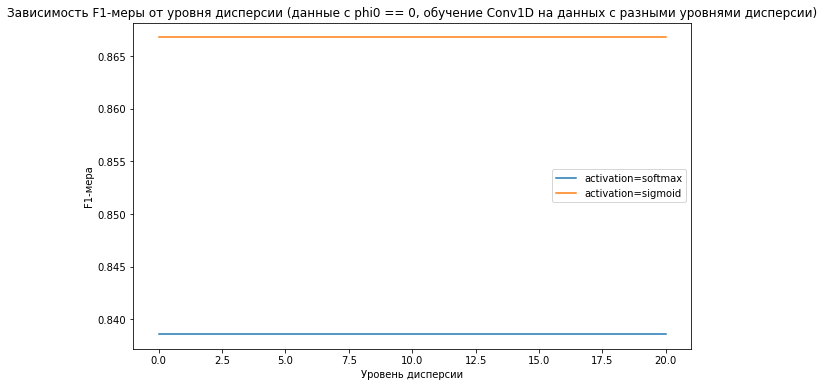

In [23]:
plt.figure(figsize=(10, 6))
for activation in f1_dict_phi0_0_all_conv1d.keys():
    plt.plot(list(f1_dict_phi0_0_all_conv1d[activation].keys()), list(f1_dict_phi0_0_all_conv1d[activation].values()), label='activation='+str(activation))
plt.legend()
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение Conv1D на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')

In [ ]:
def objective(trial):
    model1 = Sequential()
    model1.add(Conv1D(filters=trial.suggest_categorical('filters', [8, 16, 32, 40, 48, 56, 64, 72, 80, 88, 96]), 
                     kernel_size=trial.suggest_categorical('kernel_size', [i for i in range(2, 11)]), 
                     activation='relu',
                     kernel_initializer=initializer, 
                     input_shape=(256, 1)))
    model1.add(Flatten())
    model1.add(Dense(3, activation=trial.suggest_categorical('activation', ["softmax", "sigmoid"])))
    
    model1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    
    history1 = model1.fit(x=X_train_split_phi0_0, y=y_train_split_phi0_0,
                          batch_size=256,
                          epochs=4,
                          shuffle=True,
                          verbose=1,
                          initial_epoch=0) 
    
    score = model1.evaluate(X_val_split_phi0_0, y_val_split_phi0_0, verbose=0)
    
    return score[1]

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
best_trial = study.best_trial


[I 2021-02-06 16:51:32,126] A new study created in memory with name: no-name-637f5b99-f85e-4d34-aa1c-03165cbf811c


Epoch 1/4
31485/31485 [==============================] - 205s 7ms/step - loss: 0.3025 - accuracy: 0.8570
Epoch 2/4
31485/31485 [==============================] - 176s 6ms/step - loss: 0.2905 - accuracy: 0.8585
Epoch 3/4
31485/31485 [==============================] - 174s 6ms/step - loss: 0.2901 - accuracy: 0.8585
Epoch 4/4
31485/31485 [==============================] - 175s 6ms/step - loss: 0.2900 - accuracy: 0.8584


[I 2021-02-06 17:12:05,714] Trial 0 finished with value: 0.861339807510376 and parameters: {'filters': 64, 'kernel_size': 6, 'activation': 'softmax'}. Best is trial 0 with value: 0.861339807510376.


Epoch 1/4
31485/31485 [==============================] - 224s 7ms/step - loss: 0.2798 - accuracy: 0.8650
Epoch 2/4
31485/31485 [==============================] - 149s 5ms/step - loss: 0.2755 - accuracy: 0.8663
Epoch 3/4
31485/31485 [==============================] - 145s 5ms/step - loss: 0.2755 - accuracy: 0.8664
Epoch 4/4
31485/31485 [==============================] - 135s 4ms/step - loss: 0.2753 - accuracy: 0.8665


[I 2021-02-06 17:32:21,826] Trial 1 finished with value: 0.8668888211250305 and parameters: {'filters': 8, 'kernel_size': 5, 'activation': 'sigmoid'}. Best is trial 1 with value: 0.8668888211250305.


Epoch 1/4
31485/31485 [==============================] - 257s 8ms/step - loss: 0.2807 - accuracy: 0.8646
Epoch 2/4
31485/31485 [==============================] - 157s 5ms/step - loss: 0.2763 - accuracy: 0.8665
Epoch 3/4
31485/31485 [==============================] - 142s 5ms/step - loss: 0.2760 - accuracy: 0.8667
Epoch 4/4
31485/31485 [==============================] - 145s 5ms/step - loss: 0.2760 - accuracy: 0.8667


[I 2021-02-06 17:53:20,411] Trial 2 finished with value: 0.8673498034477234 and parameters: {'filters': 16, 'kernel_size': 4, 'activation': 'sigmoid'}. Best is trial 2 with value: 0.8673498034477234.


Epoch 1/4
31485/31485 [==============================] - 275s 9ms/step - loss: 0.3026 - accuracy: 0.8566
Epoch 2/4
31485/31485 [==============================] - 184s 6ms/step - loss: 0.2917 - accuracy: 0.8581
Epoch 3/4
31485/31485 [==============================] - 173s 5ms/step - loss: 0.2913 - accuracy: 0.8582
Epoch 4/4
31485/31485 [==============================] - 178s 6ms/step - loss: 0.2914 - accuracy: 0.8582


[I 2021-02-06 18:17:57,784] Trial 3 finished with value: 0.8577500581741333 and parameters: {'filters': 88, 'kernel_size': 10, 'activation': 'softmax'}. Best is trial 2 with value: 0.8673498034477234.


Epoch 1/4
31485/31485 [==============================] - 265s 8ms/step - loss: 0.2791 - accuracy: 0.8653
Epoch 2/4
31485/31485 [==============================] - 152s 5ms/step - loss: 0.2757 - accuracy: 0.8669
Epoch 3/4
31485/31485 [==============================] - 152s 5ms/step - loss: 0.2754 - accuracy: 0.8670
Epoch 4/4
31485/31485 [==============================] - 151s 5ms/step - loss: 0.2754 - accuracy: 0.8669


[I 2021-02-06 18:39:54,338] Trial 4 finished with value: 0.8671780228614807 and parameters: {'filters': 64, 'kernel_size': 2, 'activation': 'sigmoid'}. Best is trial 2 with value: 0.8673498034477234.


Epoch 1/4
31485/31485 [==============================] - 302s 10ms/step - loss: 0.2806 - accuracy: 0.8646
Epoch 2/4
31485/31485 [==============================] - 146s 5ms/step - loss: 0.2757 - accuracy: 0.8665
Epoch 3/4
31485/31485 [==============================] - 152s 5ms/step - loss: 0.2749 - accuracy: 0.8667
Epoch 4/4
31485/31485 [==============================] - 154s 5ms/step - loss: 0.2748 - accuracy: 0.8667


[I 2021-02-06 19:02:34,406] Trial 5 finished with value: 0.8655830025672913 and parameters: {'filters': 40, 'kernel_size': 2, 'activation': 'sigmoid'}. Best is trial 2 with value: 0.8673498034477234.


Epoch 1/4
31485/31485 [==============================] - 322s 10ms/step - loss: 0.3008 - accuracy: 0.8568
Epoch 2/4
31485/31485 [==============================] - 158s 5ms/step - loss: 0.2900 - accuracy: 0.8589
Epoch 3/4
31485/31485 [==============================] - 161s 5ms/step - loss: 0.2899 - accuracy: 0.8594
Epoch 4/4
31485/31485 [==============================] - 159s 5ms/step - loss: 0.2899 - accuracy: 0.8594


In [ ]:
best_trial

In [53]:
# fitting on full data

history5 = model2.fit(
    x=X_train_phi0_0, y=Y_train_phi0_0_cat,
    batch_size=256,
    epochs=4,
    shuffle=True,
    verbose=1,
    initial_epoch=0
) 

Epoch 1/4
46993/46993 [==============================] - 211s 4ms/step - loss: 0.3013 - accuracy: 0.8574
Epoch 2/4
46993/46993 [==============================] - 179s 4ms/step - loss: 0.2915 - accuracy: 0.8586
Epoch 3/4
46993/46993 [==============================] - 178s 4ms/step - loss: 0.2916 - accuracy: 0.8585
Epoch 4/4
46993/46993 [==============================] - 177s 4ms/step - loss: 0.2916 - accuracy: 0.8586


In [54]:
pred5 = model2.predict_classes(X_test_phi0_0)
df5 = pd.DataFrame(columns=['y_true', 'y_pred', 'disp'])
df5['y_true'] = Y_test_phi0_0.T[0]
df5['y_pred'] = pred5
df5['disp'] = dispersia_test_phi0_0
df5.head()

,y_true,y_pred,disp
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0


In [55]:
f1_dict_phi0_0_all_conv1d = dict()
for s in df5['disp'].unique():
    df = df5[df5['disp'] == s]
    f1_dict_phi0_0_all_conv1d[s] = f1_score(df['y_true'].values, df['y_pred'].values, average='micro')

Text(0, 0.5, 'F1-мера')

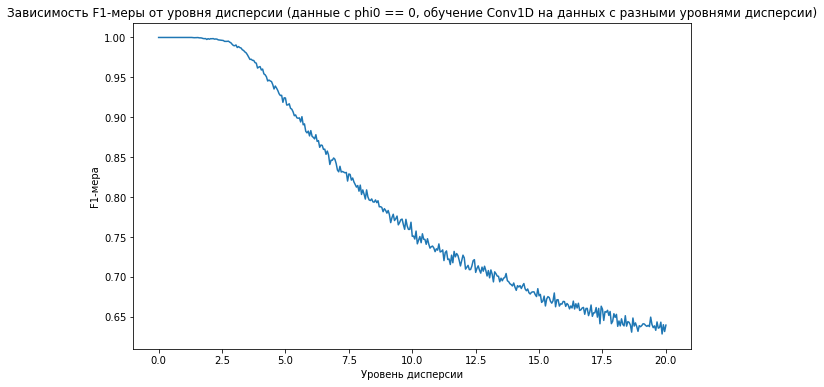

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_0_all_conv1d.keys()), list(f1_dict_phi0_0_all_conv1d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение Conv1D на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')

In [57]:
df5['disp_db'] = 10 * np.log10(df5['disp'])
df5.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,y_true,y_pred,disp,disp_db
0,0,0,0.0,-inf
1,0,0,0.0,-inf
2,0,0,0.0,-inf
3,0,0,0.0,-inf
4,0,0,0.0,-inf


Text(0, 0.5, 'F1-мера')

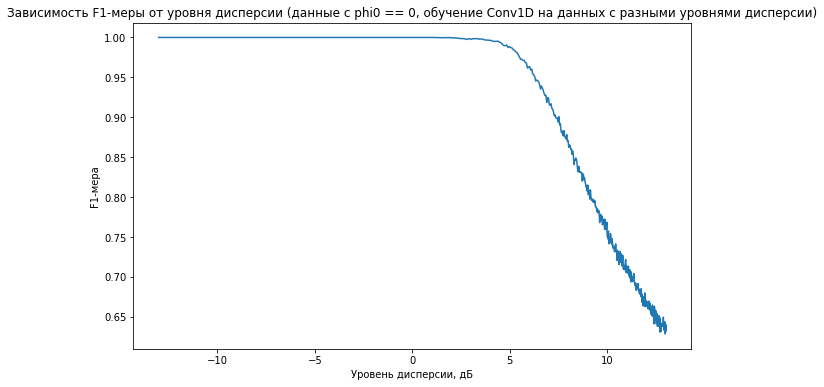

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(list(df5['disp_db'].unique()), list(f1_dict_phi0_0_all_conv1d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение Conv1D на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')

In [59]:
# fitting on data with dispersia == 0

history6 = model2.fit(
    x=X_train_phi0_0[dispersia_train_phi0_0 == 0], y=Y_train_phi0_0_cat[dispersia_train_phi0_0 == 0],
    batch_size=256,
    epochs=4,
    shuffle=True,
    verbose=1,
    initial_epoch=0
) 

Epoch 1/4
15743/15743 [==============================] - 60s 4ms/step - loss: 7.6852e-07 - accuracy: 1.0000
Epoch 2/4
15743/15743 [==============================] - 59s 4ms/step - loss: 9.4167e-11 - accuracy: 1.0000
Epoch 3/4
15743/15743 [==============================] - 60s 4ms/step - loss: 6.7443e-12 - accuracy: 1.0000
Epoch 4/4
15743/15743 [==============================] - 60s 4ms/step - loss: 6.5372e-12 - accuracy: 1.0000


In [60]:
pred6 = model2.predict_classes(X_test_phi0_0)
df6 = pd.DataFrame(columns=['y_true', 'y_pred', 'disp'])
df6['y_true'] = Y_test_phi0_0.T[0]
df6['y_pred'] = pred6
df6['disp'] = dispersia_test_phi0_0
df6.head()

,y_true,y_pred,disp
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0


In [61]:
f1_dict_phi0_0_disp_0_conv1d = dict()
for s in df6['disp'].unique():
    df = df6[df6['disp'] == s]
    f1_dict_phi0_0_disp_0_conv1d[s] = f1_score(df['y_true'].values, df['y_pred'].values, average='micro')

Text(0, 0.5, 'F1-мера')

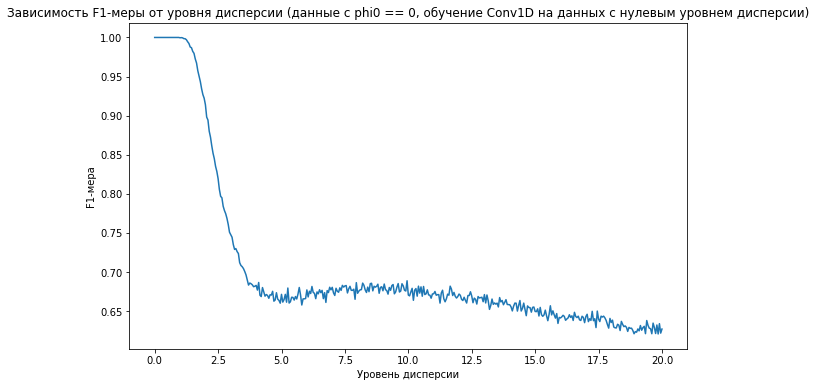

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_0_disp_0_conv1d.keys()), list(f1_dict_phi0_0_disp_0_conv1d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение Conv1D на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')

In [63]:
df6['disp_db'] = 10 * np.log10(df6['disp'])
df6.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,y_true,y_pred,disp,disp_db
0,0,0,0.0,-inf
1,0,0,0.0,-inf
2,0,0,0.0,-inf
3,0,0,0.0,-inf
4,0,0,0.0,-inf


Text(0, 0.5, 'F1-мера')

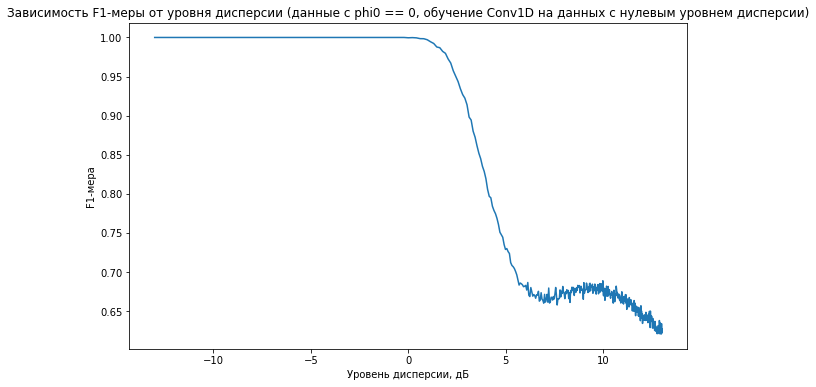

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(list(df6['disp_db'].unique()), list(f1_dict_phi0_0_disp_0_conv1d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение Conv1D на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')

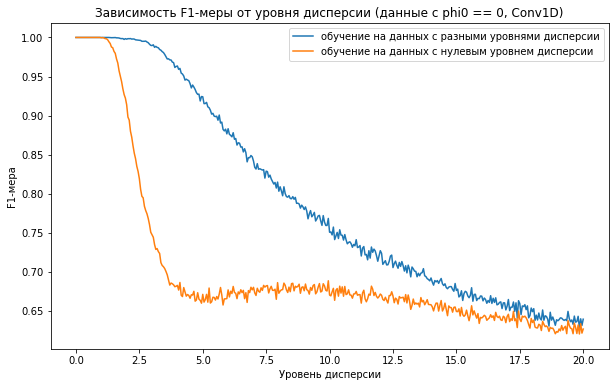

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_0_all_conv1d.keys()), list(f1_dict_phi0_0_all_conv1d.values()), label='обучение на данных с разными уровнями дисперсии')
plt.plot(list(df6['disp'].unique()), list(f1_dict_phi0_0_disp_0_conv1d.values()), label='обучение на данных с нулевым уровнем дисперсии')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, Conv1D)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')
plt.legend()

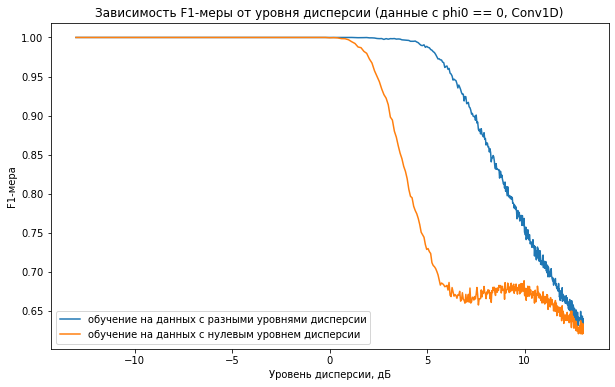

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(list(df5['disp_db'].unique()), list(f1_dict_phi0_0_all_conv1d.values()), label='обучение на данных с разными уровнями дисперсии')
plt.plot(list(df6['disp_db'].unique()), list(f1_dict_phi0_0_disp_0_conv1d.values()), label='обучение на данных с нулевым уровнем дисперсии')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, Conv1D)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')
plt.legend()

## for data with phi0 == random

In [67]:
# fitting on full data

history7 = model2.fit(
    x=X_train_phi0_random, y=Y_train_phi0_random_cat,
    batch_size=256,
    epochs=4,
    shuffle=True,
    verbose=1,
    initial_epoch=0
) 

Epoch 1/4
46993/46993 [==============================] - 179s 4ms/step - loss: 0.4876 - accuracy: 0.6654
Epoch 2/4
46993/46993 [==============================] - 179s 4ms/step - loss: 0.4691 - accuracy: 0.6657
Epoch 3/4
46993/46993 [==============================] - 178s 4ms/step - loss: 0.4691 - accuracy: 0.6657
Epoch 4/4
46993/46993 [==============================] - 178s 4ms/step - loss: 0.4692 - accuracy: 0.6657


In [68]:
pred7 = model2.predict_classes(X_test_phi0_random)
df7 = pd.DataFrame(columns=['y_true', 'y_pred', 'disp'])
df7['y_true'] = Y_test_phi0_random.T[0]
df7['y_pred'] = pred7
df7['disp'] = dispersia_test_phi0_random
df7

,y_true,y_pred,disp
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0
...,...,...,...
6014995,2,2,20.0
6014996,2,1,20.0
6014997,2,2,20.0
6014998,2,2,20.0


In [69]:
f1_dict_phi0_random_all_conv1d = dict()
for s in df7['disp'].unique():
    df = df7[df7['disp'] == s]
    f1_dict_phi0_random_all_conv1d[s] = f1_score(df['y_true'].values, df['y_pred'].values, average='micro')

Text(0, 0.5, 'F1-мера')

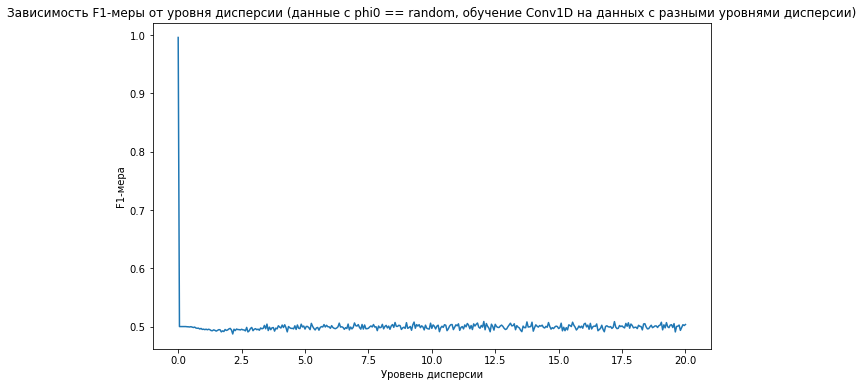

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_random_all_conv1d.keys()), list(f1_dict_phi0_random_all_conv1d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение Conv1D на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')

In [71]:
df7['disp_db'] = 10 * np.log10(df7['disp'])
df7.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,y_true,y_pred,disp,disp_db
0,0,0,0.0,-inf
1,0,0,0.0,-inf
2,0,0,0.0,-inf
3,0,0,0.0,-inf
4,0,0,0.0,-inf


Text(0, 0.5, 'F1-мера')

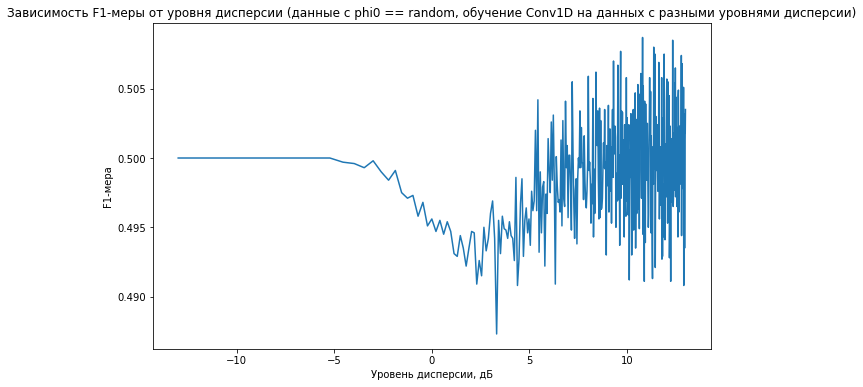

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(list(df7['disp_db'].unique()), list(f1_dict_phi0_random_all_conv1d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение Conv1D на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')

In [73]:
# fitting on data with dispersia == 0

history8 = model2.fit(
    x=X_train_phi0_random[dispersia_train_phi0_random == 0], y=Y_train_phi0_random_cat[dispersia_train_phi0_random == 0],
    batch_size=256,
    epochs=4,
    shuffle=True,
    verbose=1,
    initial_epoch=0
) 

Epoch 1/4
15743/15743 [==============================] - 59s 4ms/step - loss: 0.0052 - accuracy: 0.9973
Epoch 2/4
15743/15743 [==============================] - 59s 4ms/step - loss: 0.0046 - accuracy: 0.9975
Epoch 3/4
15743/15743 [==============================] - 59s 4ms/step - loss: 0.0044 - accuracy: 0.9976
Epoch 4/4
15743/15743 [==============================] - 59s 4ms/step - loss: 0.0043 - accuracy: 0.9977


In [74]:
pred8 = model2.predict_classes(X_test_phi0_random)
df8 = pd.DataFrame(columns=['y_true', 'y_pred', 'disp'])
df8['y_true'] = Y_test_phi0_random.T[0]
df8['y_pred'] = pred8
df8['disp'] = dispersia_test_phi0_random
df8.head()

,y_true,y_pred,disp
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0


In [75]:
f1_dict_phi0_random_disp_0_conv1d = dict()
for s in df8['disp'].unique():
    df = df8[df8['disp'] == s]
    f1_dict_phi0_random_disp_0_conv1d[s] = f1_score(df['y_true'].values, df['y_pred'].values, average='micro')

Text(0, 0.5, 'F1-мера')

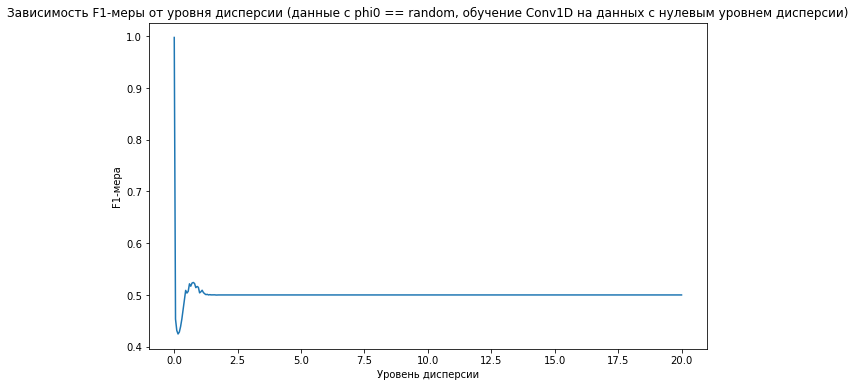

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_random_disp_0_conv1d.keys()), list(f1_dict_phi0_random_disp_0_conv1d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение Conv1D на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')

In [77]:
df8['disp_db'] = 10 * np.log10(df8['disp'])
df8.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,y_true,y_pred,disp,disp_db
0,0,0,0.0,-inf
1,0,0,0.0,-inf
2,0,0,0.0,-inf
3,0,0,0.0,-inf
4,0,0,0.0,-inf


Text(0, 0.5, 'F1-мера')

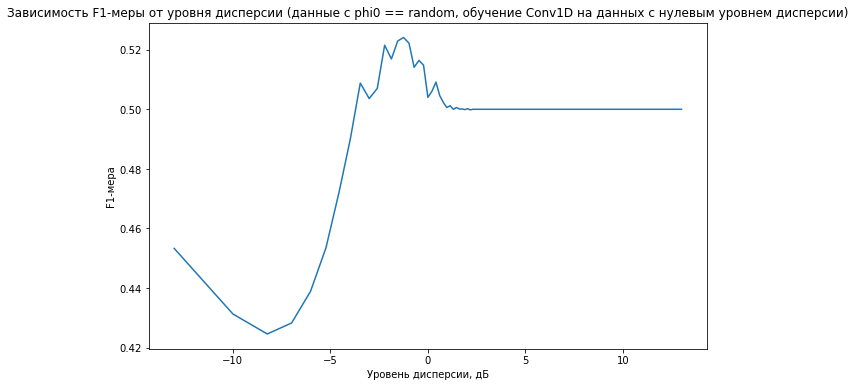

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(list(df8['disp_db'].unique()), list(f1_dict_phi0_random_disp_0_conv1d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение Conv1D на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')

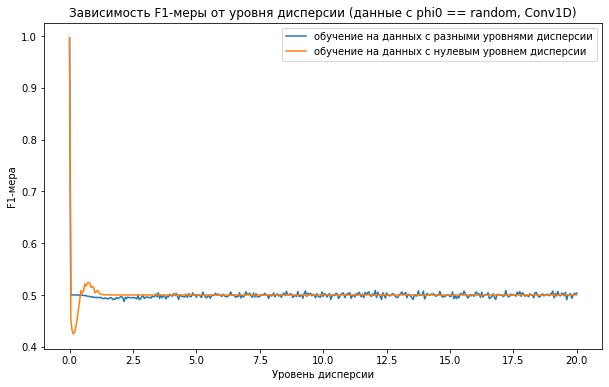

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_random_all_conv1d.keys()), list(f1_dict_phi0_random_all_conv1d.values()), label='обучение на данных с разными уровнями дисперсии')
plt.plot(list(df7['disp'].unique()), list(f1_dict_phi0_random_disp_0_conv1d.values()), label='обучение на данных с нулевым уровнем дисперсии')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, Conv1D)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')
plt.legend()

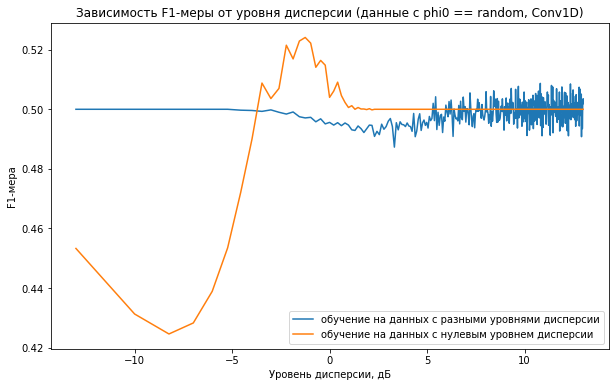

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(list(df7['disp_db'].unique()), list(f1_dict_phi0_random_all_conv1d.values()), label='обучение на данных с разными уровнями дисперсии')
plt.plot(list(df8['disp_db'].unique()), list(f1_dict_phi0_random_disp_0_conv1d.values()), label='обучение на данных с нулевым уровнем дисперсии')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, Conv1D)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')
plt.legend()

# Conv2D

In [81]:
# K.set_image_data_format('channels_last')

In [82]:
weight_decay = 1e-4
initializer='glorot_normal'

model3 = Sequential()
model3.add(Conv2D(filters=32, 
                  kernel_size=(3, 3), 
                  activation='relu',
                  kernel_initializer=initializer, 
                  padding='same',
                  input_shape=(256, 1, 1)))
model3.add(Flatten())
model3.add(Dense(3, kernel_initializer=initializer))
model3.add(Activation("softmax"))



In [83]:
from tensorflow.keras import optimizers

INIT_LR = 5e-3

model3.compile(
#     loss='sparse_categorical_crossentropy', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 1, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 24579     
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 24,899
Trainable params: 24,899
Non-trainable params: 0
_________________________________________________________________


In [84]:
#X_train_phi0_0 = X_train_phi0_0.reshape((X_train_phi0_0.shape[0], X_train_phi0_0.shape[1], 1, 1))

X_train_phi0_0 = X_train_phi0_0.reshape((X_train_phi0_0.shape[0], X_train_phi0_0.shape[1], 1, 1))
X_test_phi0_0 = X_test_phi0_0.reshape((X_test_phi0_0.shape[0], X_test_phi0_0.shape[1], 1, 1))
X_train_phi0_random = X_train_phi0_random.reshape((X_train_phi0_random.shape[0], X_train_phi0_random.shape[1], 1, 1))
X_test_phi0_random = X_test_phi0_random.reshape((X_test_phi0_random.shape[0], X_test_phi0_random.shape[1], 1, 1))
X_train_phi0_0.shape, X_test_phi0_0.shape, X_train_phi0_random.shape, X_test_phi0_random.shape

((12030000, 256, 1, 1),
 (6015000, 256, 1, 1),
 (12030000, 256, 1, 1),
 (6015000, 256, 1, 1))

## for data with phi0 == 0

In [85]:
# fitting on full data

history7 = model3.fit(
    x=X_train_phi0_0, y=Y_train_phi0_0_cat,
    batch_size=256,
    epochs=4,
    shuffle=True,
    verbose=1,
    initial_epoch=0
) 

Epoch 1/4
46993/46993 [==============================] - 206s 4ms/step - loss: 0.2981 - accuracy: 0.8578
Epoch 2/4
46993/46993 [==============================] - 168s 4ms/step - loss: 0.2914 - accuracy: 0.8587
Epoch 3/4
46993/46993 [==============================] - 167s 4ms/step - loss: 0.2914 - accuracy: 0.8587
Epoch 4/4
46993/46993 [==============================] - 168s 4ms/step - loss: 0.2915 - accuracy: 0.8586


In [86]:
pred9 = model3.predict_classes(X_test_phi0_0)
df9 = pd.DataFrame(columns=['y_true', 'y_pred', 'disp'])
df9['y_true'] = Y_test_phi0_0.T[0]
df9['y_pred'] = pred9
df9['disp'] = dispersia_test_phi0_0
df9.head()

,y_true,y_pred,disp
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0


In [87]:
f1_dict_phi0_0_all_conv2d = dict()
for s in df9['disp'].unique():
    df = df9[df9['disp'] == s]
    f1_dict_phi0_0_all_conv2d[s] = f1_score(df['y_true'].values, df['y_pred'].values, average='micro')

Text(0, 0.5, 'F1-мера')

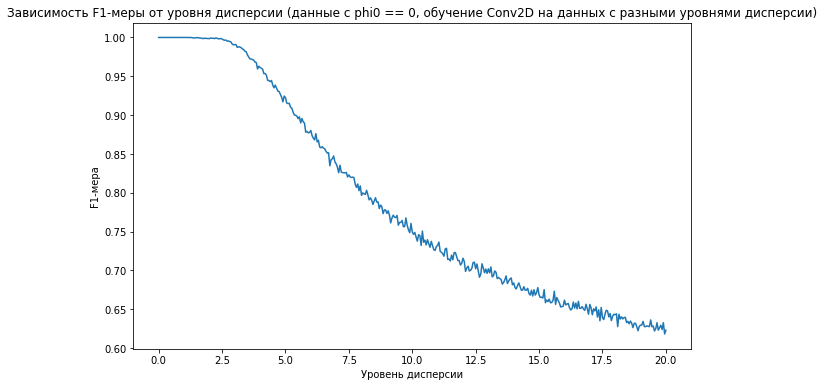

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_0_all_conv2d.keys()), list(f1_dict_phi0_0_all_conv2d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение Conv2D на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')

In [89]:
df9['disp_db'] = 10 * np.log10(df9['disp'])
df9.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,y_true,y_pred,disp,disp_db
0,0,0,0.0,-inf
1,0,0,0.0,-inf
2,0,0,0.0,-inf
3,0,0,0.0,-inf
4,0,0,0.0,-inf


Text(0, 0.5, 'F1-мера')

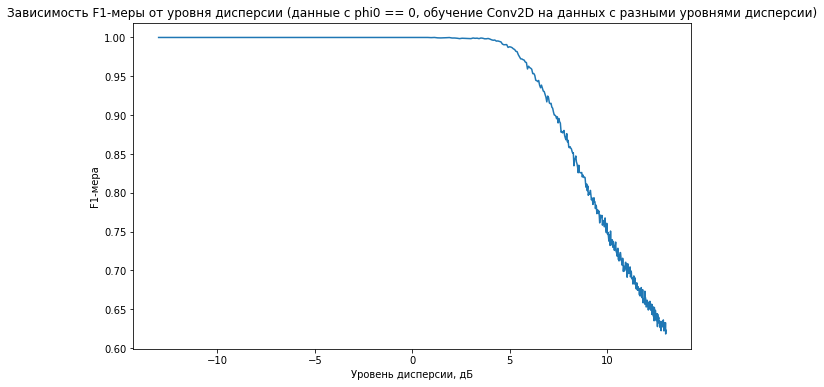

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(list(df9['disp_db'].unique()), list(f1_dict_phi0_0_all_conv2d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение Conv2D на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')

In [91]:
# fitting on data with dispersia == 0

history10 = model3.fit(
    x=X_train_phi0_0[dispersia_train_phi0_0 == 0], y=Y_train_phi0_0_cat[dispersia_train_phi0_0 == 0],
    batch_size=256,
    epochs=4,
    shuffle=True,
    verbose=1,
    initial_epoch=0
) 

Epoch 1/4
15743/15743 [==============================] - 56s 4ms/step - loss: 6.7410e-07 - accuracy: 1.0000
Epoch 2/4
15743/15743 [==============================] - 56s 4ms/step - loss: 5.3560e-10 - accuracy: 1.0000
Epoch 3/4
15743/15743 [==============================] - 56s 4ms/step - loss: 2.4018e-11 - accuracy: 1.0000
Epoch 4/4
15743/15743 [==============================] - 56s 4ms/step - loss: 1.0323e-11 - accuracy: 1.0000


In [92]:
pred10 = model3.predict_classes(X_test_phi0_0)
df10 = pd.DataFrame(columns=['y_true', 'y_pred', 'disp'])
df10['y_true'] = Y_test_phi0_0.T[0]
df10['y_pred'] = pred10
df10['disp'] = dispersia_test_phi0_0
df10.head()

,y_true,y_pred,disp
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0


In [93]:
f1_dict_phi0_0_disp_0_conv2d = dict()
for s in df10['disp'].unique():
    df = df10[df10['disp'] == s]
    f1_dict_phi0_0_disp_0_conv2d[s] = f1_score(df['y_true'].values, df['y_pred'].values, average='micro')

Text(0, 0.5, 'F1-мера')

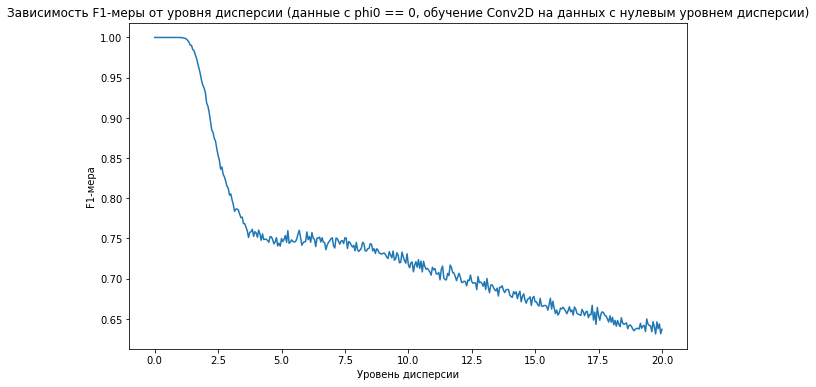

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_0_disp_0_conv2d.keys()), list(f1_dict_phi0_0_disp_0_conv2d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение Conv2D на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')

In [95]:
df10['disp_db'] = 10 * np.log10(df10['disp'])
df10.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,y_true,y_pred,disp,disp_db
0,0,0,0.0,-inf
1,0,0,0.0,-inf
2,0,0,0.0,-inf
3,0,0,0.0,-inf
4,0,0,0.0,-inf


Text(0, 0.5, 'F1-мера')

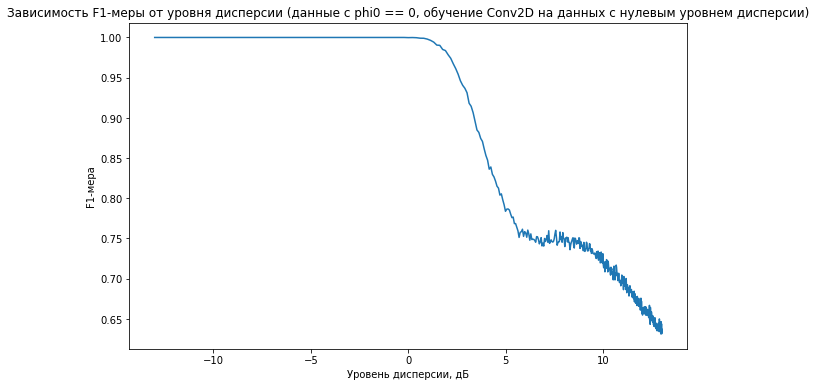

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(list(df10['disp_db'].unique()), list(f1_dict_phi0_0_disp_0_conv2d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение Conv2D на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')

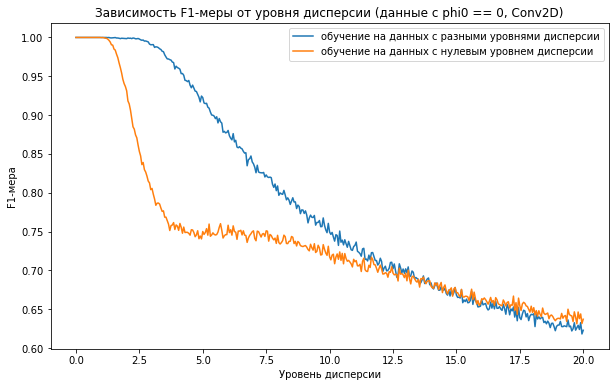

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_0_all_conv2d.keys()), list(f1_dict_phi0_0_all_conv2d.values()), label='обучение на данных с разными уровнями дисперсии')
plt.plot(list(df10['disp'].unique()), list(f1_dict_phi0_0_disp_0_conv2d.values()), label='обучение на данных с нулевым уровнем дисперсии')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, Conv2D)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')
plt.legend()

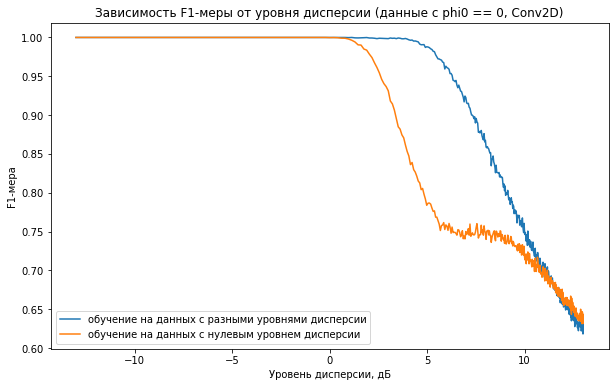

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(list(df9['disp_db'].unique()), list(f1_dict_phi0_0_all_conv2d.values()), label='обучение на данных с разными уровнями дисперсии')
plt.plot(list(df10['disp_db'].unique()), list(f1_dict_phi0_0_disp_0_conv2d.values()), label='обучение на данных с нулевым уровнем дисперсии')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, Conv2D)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')
plt.legend()

## for data with phi0 == random

In [99]:
# fitting on full data

history11 = model3.fit(
    x=X_train_phi0_random, y=Y_train_phi0_random_cat,
    batch_size=256,
    epochs=4,
    shuffle=True,
    verbose=1,
    initial_epoch=0
) 

Epoch 1/4
46993/46993 [==============================] - 167s 4ms/step - loss: 0.4853 - accuracy: 0.6656
Epoch 2/4
46993/46993 [==============================] - 168s 4ms/step - loss: 0.4692 - accuracy: 0.6658
Epoch 3/4
46993/46993 [==============================] - 169s 4ms/step - loss: 0.4692 - accuracy: 0.6657
Epoch 4/4
46993/46993 [==============================] - 168s 4ms/step - loss: 0.4693 - accuracy: 0.6658


In [100]:
pred11 = model3.predict_classes(X_test_phi0_random)
df11 = pd.DataFrame(columns=['y_true', 'y_pred', 'disp'])
df11['y_true'] = Y_test_phi0_random.T[0]
df11['y_pred'] = pred11
df11['disp'] = dispersia_test_phi0_random
df11

,y_true,y_pred,disp
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0
...,...,...,...
6014995,2,1,20.0
6014996,2,1,20.0
6014997,2,1,20.0
6014998,2,1,20.0


In [101]:
f1_dict_phi0_random_all_conv2d = dict()
for s in df11['disp'].unique():
    df = df11[df11['disp'] == s]
    f1_dict_phi0_random_all_conv2d[s] = f1_score(df['y_true'].values, df['y_pred'].values, average='micro')

Text(0, 0.5, 'F1-мера')

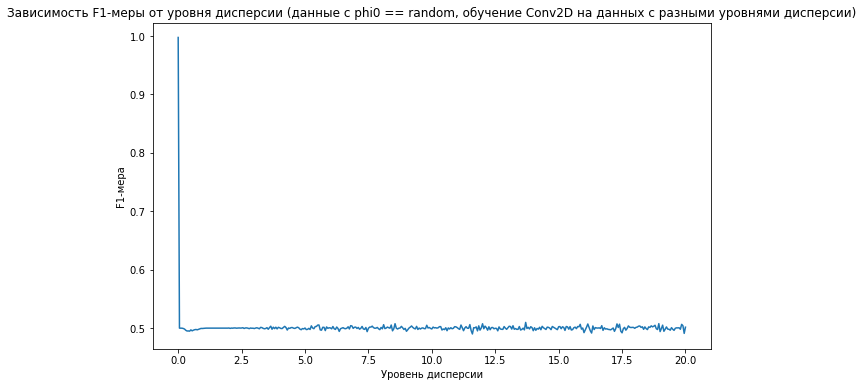

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_random_all_conv2d.keys()), list(f1_dict_phi0_random_all_conv2d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение Conv2D на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')

In [103]:
df11['disp_db'] = 10 * np.log10(df11['disp'])
df11.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,y_true,y_pred,disp,disp_db
0,0,0,0.0,-inf
1,0,0,0.0,-inf
2,0,0,0.0,-inf
3,0,0,0.0,-inf
4,0,0,0.0,-inf


Text(0, 0.5, 'F1-мера')

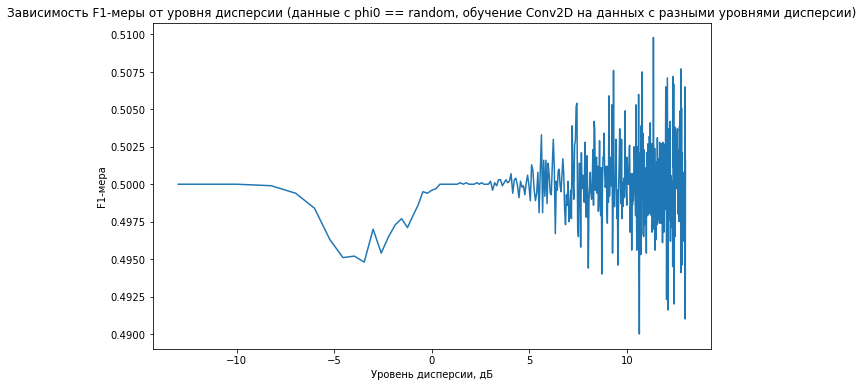

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(list(df11['disp_db'].unique()), list(f1_dict_phi0_random_all_conv2d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение Conv2D на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')

In [105]:
# fitting on data with dispersia == 0

history12 = model3.fit(
    x=X_train_phi0_random[dispersia_train_phi0_random == 0], y=Y_train_phi0_random_cat[dispersia_train_phi0_random == 0],
    batch_size=256,
    epochs=4,
    shuffle=True,
    verbose=1,
    initial_epoch=0
) 

Epoch 1/4
15743/15743 [==============================] - 56s 4ms/step - loss: 0.0052 - accuracy: 0.9973
Epoch 2/4
15743/15743 [==============================] - 56s 4ms/step - loss: 0.0046 - accuracy: 0.9975
Epoch 3/4
15743/15743 [==============================] - 56s 4ms/step - loss: 0.0044 - accuracy: 0.9976
Epoch 4/4
15743/15743 [==============================] - 56s 4ms/step - loss: 0.0042 - accuracy: 0.9977


In [106]:
pred12 = model3.predict_classes(X_test_phi0_random)
df12 = pd.DataFrame(columns=['y_true', 'y_pred', 'disp'])
df12['y_true'] = Y_test_phi0_random.T[0]
df12['y_pred'] = pred12
df12['disp'] = dispersia_test_phi0_random
df12.head()

,y_true,y_pred,disp
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0


In [107]:
f1_dict_phi0_random_disp_0_conv2d = dict()
for s in df12['disp'].unique():
    df = df12[df12['disp'] == s]
    f1_dict_phi0_random_disp_0_conv2d[s] = f1_score(df['y_true'].values, df['y_pred'].values, average='micro')

Text(0, 0.5, 'F1-мера')

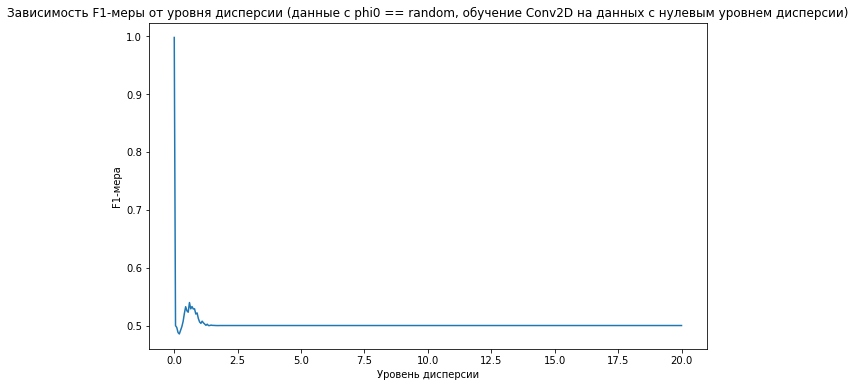

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_random_disp_0_conv2d.keys()), list(f1_dict_phi0_random_disp_0_conv2d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение Conv2D на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')

In [109]:
df12['disp_db'] = 10 * np.log10(df12['disp'])
df12.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,y_true,y_pred,disp,disp_db
0,0,0,0.0,-inf
1,0,0,0.0,-inf
2,0,0,0.0,-inf
3,0,0,0.0,-inf
4,0,0,0.0,-inf


Text(0, 0.5, 'F1-мера')

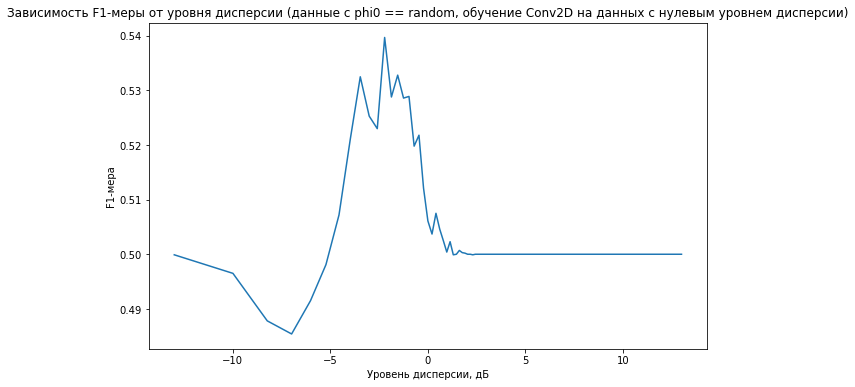

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(list(df12['disp_db'].unique()), list(f1_dict_phi0_random_disp_0_conv2d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение Conv2D на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')

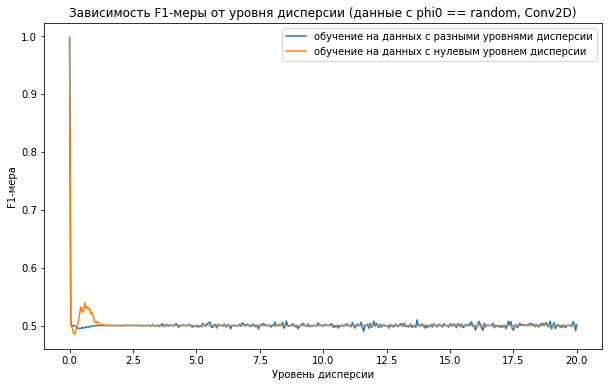

In [111]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_random_all_conv2d.keys()), list(f1_dict_phi0_random_all_conv2d.values()), label='обучение на данных с разными уровнями дисперсии')
plt.plot(list(df11['disp'].unique()), list(f1_dict_phi0_random_disp_0_conv2d.values()), label='обучение на данных с нулевым уровнем дисперсии')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, Conv2D)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')
plt.legend()

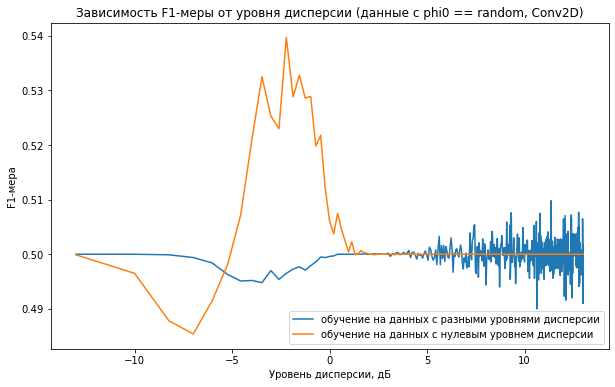

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(list(df11['disp_db'].unique()), list(f1_dict_phi0_random_all_conv2d.values()), label='обучение на данных с разными уровнями дисперсии')
plt.plot(list(df12['disp_db'].unique()), list(f1_dict_phi0_random_disp_0_conv2d.values()), label='обучение на данных с нулевым уровнем дисперсии')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, Conv2D)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')
plt.legend()

# Separable Conv2D

In [113]:
weight_decay = 1e-4
initializer='glorot_normal'

model4 = Sequential()
model4.add(SeparableConv2D(filters=32, 
                           kernel_size=(3, 3), 
                           activation='relu',
                           kernel_initializer=initializer, 
                           padding='same',
                           input_shape=(256, 1, 1)))
model4.add(Flatten())
model4.add(Dense(3, kernel_initializer=initializer))
model4.add(Activation("softmax"))



In [114]:
from tensorflow.keras import optimizers

INIT_LR = 5e-3

model4.compile(
#     loss='sparse_categorical_crossentropy', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 256, 1, 32)        73        
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 24579     
_________________________________________________________________
activation_3 (Activation)    (None, 3)                 0         
Total params: 24,652
Trainable params: 24,652
Non-trainable params: 0
_________________________________________________________________


## for data with phi0 == 0

In [115]:
# fitting on full data

history13 = model4.fit(
    x=X_train_phi0_0, y=Y_train_phi0_0_cat,
    batch_size=256,
    epochs=4,
    shuffle=True,
    verbose=1,
    initial_epoch=0
) 

Epoch 1/4
46993/46993 [==============================] - 275s 6ms/step - loss: 0.2983 - accuracy: 0.8582
Epoch 2/4
46993/46993 [==============================] - 153s 3ms/step - loss: 0.2905 - accuracy: 0.8594
Epoch 3/4
46993/46993 [==============================] - 152s 3ms/step - loss: 0.2899 - accuracy: 0.8594
Epoch 4/4
46993/46993 [==============================] - 154s 3ms/step - loss: 0.2897 - accuracy: 0.8594


In [116]:
pred13 = model4.predict_classes(X_test_phi0_0)
df13 = pd.DataFrame(columns=['y_true', 'y_pred', 'disp'])
df13['y_true'] = Y_test_phi0_0.T[0]
df13['y_pred'] = pred13
df13['disp'] = dispersia_test_phi0_0
df13.head()

,y_true,y_pred,disp
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0


In [117]:
f1_dict_phi0_0_all_sep_conv2d = dict()
for s in df13['disp'].unique():
    df = df13[df13['disp'] == s]
    f1_dict_phi0_0_all_sep_conv2d[s] = f1_score(df['y_true'].values, df['y_pred'].values, average='micro')

Text(0, 0.5, 'F1-мера')

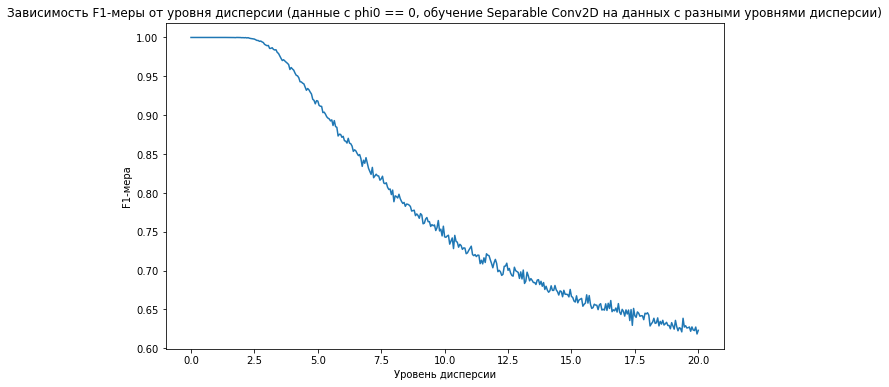

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_0_all_sep_conv2d.keys()), list(f1_dict_phi0_0_all_sep_conv2d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение Separable Conv2D на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')

In [119]:
df13['disp_db'] = 10 * np.log10(df13['disp'])
df13.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,y_true,y_pred,disp,disp_db
0,0,0,0.0,-inf
1,0,0,0.0,-inf
2,0,0,0.0,-inf
3,0,0,0.0,-inf
4,0,0,0.0,-inf


Text(0, 0.5, 'F1-мера')

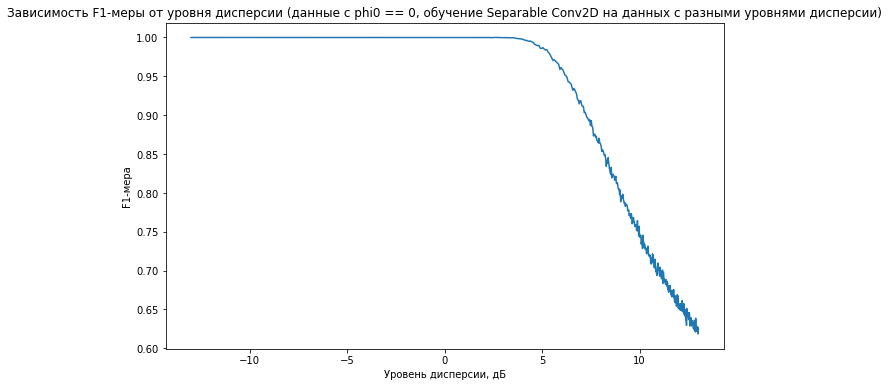

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(list(df13['disp_db'].unique()), list(f1_dict_phi0_0_all_sep_conv2d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение Separable Conv2D на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')

In [121]:
# fitting on data with dispersia == 0

history14 = model4.fit(
    x=X_train_phi0_0[dispersia_train_phi0_0 == 0], y=Y_train_phi0_0_cat[dispersia_train_phi0_0 == 0],
    batch_size=256,
    epochs=4,
    shuffle=True,
    verbose=1,
    initial_epoch=0
) 

Epoch 1/4
15743/15743 [==============================] - 54s 3ms/step - loss: 3.5531e-07 - accuracy: 1.0000
Epoch 2/4
15743/15743 [==============================] - 54s 3ms/step - loss: 6.2119e-13 - accuracy: 1.0000
Epoch 3/4
15743/15743 [==============================] - 53s 3ms/step - loss: 7.6602e-11 - accuracy: 1.0000
Epoch 4/4
15743/15743 [==============================] - 52s 3ms/step - loss: 3.5497e-13 - accuracy: 1.0000


In [122]:
pred14 = model4.predict_classes(X_test_phi0_0)
df14 = pd.DataFrame(columns=['y_true', 'y_pred', 'disp'])
df14['y_true'] = Y_test_phi0_0.T[0]
df14['y_pred'] = pred14
df14['disp'] = dispersia_test_phi0_0
df14.head()

,y_true,y_pred,disp
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0


In [123]:
f1_dict_phi0_0_disp_0_sep_conv2d = dict()
for s in df14['disp'].unique():
    df = df14[df14['disp'] == s]
    f1_dict_phi0_0_disp_0_sep_conv2d[s] = f1_score(df['y_true'].values, df['y_pred'].values, average='micro')

Text(0, 0.5, 'F1-мера')

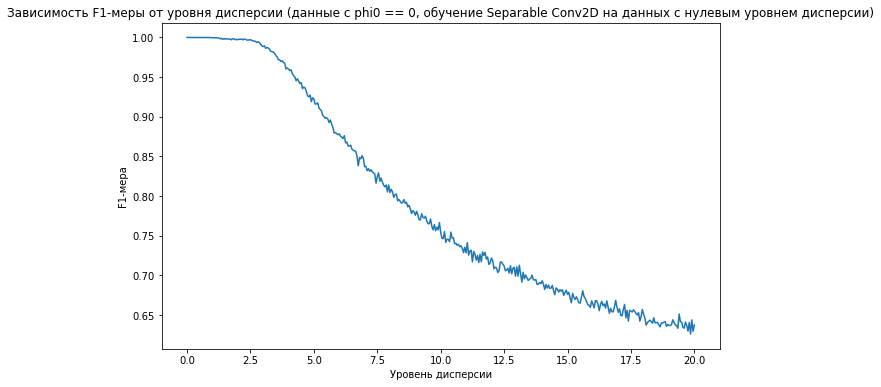

In [124]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_0_disp_0_sep_conv2d.keys()), list(f1_dict_phi0_0_disp_0_sep_conv2d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение Separable Conv2D на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')

In [125]:
df14['disp_db'] = 10 * np.log10(df14['disp'])
df14.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,y_true,y_pred,disp,disp_db
0,0,0,0.0,-inf
1,0,0,0.0,-inf
2,0,0,0.0,-inf
3,0,0,0.0,-inf
4,0,0,0.0,-inf


Text(0, 0.5, 'F1-мера')

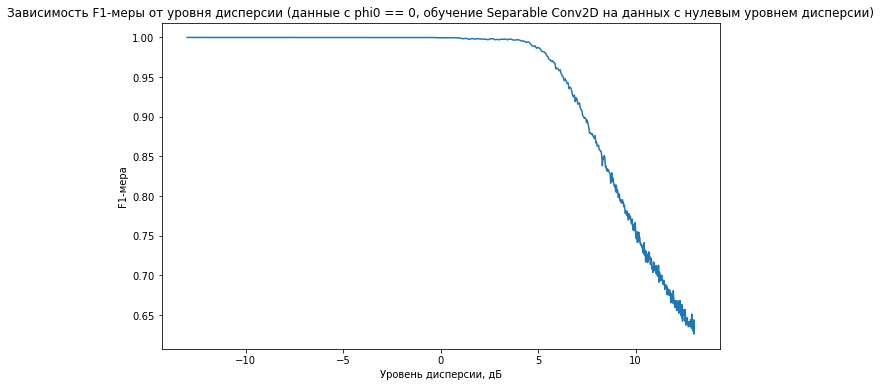

In [126]:
plt.figure(figsize=(10, 6))
plt.plot(list(df14['disp_db'].unique()), list(f1_dict_phi0_0_disp_0_sep_conv2d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение Separable Conv2D на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')

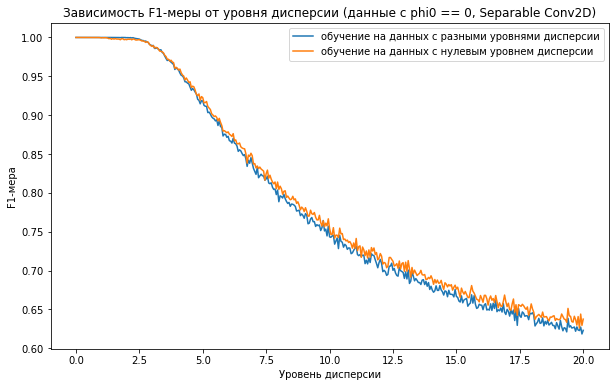

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_0_all_sep_conv2d.keys()), list(f1_dict_phi0_0_all_sep_conv2d.values()), label='обучение на данных с разными уровнями дисперсии')
plt.plot(list(df14['disp'].unique()), list(f1_dict_phi0_0_disp_0_sep_conv2d.values()), label='обучение на данных с нулевым уровнем дисперсии')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, Separable Conv2D)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')
plt.legend()

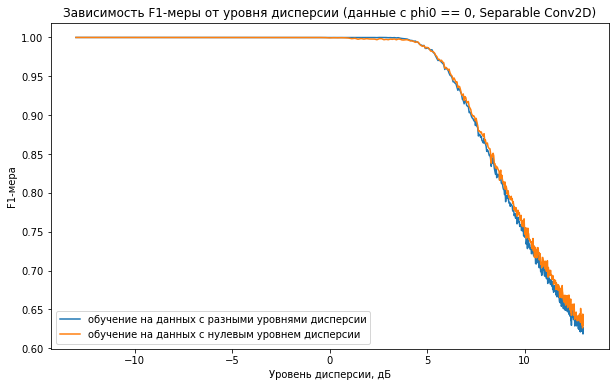

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(list(df13['disp_db'].unique()), list(f1_dict_phi0_0_all_sep_conv2d.values()), label='обучение на данных с разными уровнями дисперсии')
plt.plot(list(df14['disp_db'].unique()), list(f1_dict_phi0_0_disp_0_sep_conv2d.values()), label='обучение на данных с нулевым уровнем дисперсии')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, Separable Conv2D)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')
plt.legend()

## for data with phi0 == random

In [129]:
# fitting on full data

history15 = model4.fit(
    x=X_train_phi0_random, y=Y_train_phi0_random_cat,
    batch_size=256,
    epochs=4,
    shuffle=True,
    verbose=1,
    initial_epoch=0
) 

Epoch 1/4
46993/46993 [==============================] - 157s 3ms/step - loss: 0.4897 - accuracy: 0.6632
Epoch 2/4
46993/46993 [==============================] - 150s 3ms/step - loss: 0.4706 - accuracy: 0.6661
Epoch 3/4
46993/46993 [==============================] - 154s 3ms/step - loss: 0.4700 - accuracy: 0.6663
Epoch 4/4
46993/46993 [==============================] - 152s 3ms/step - loss: 0.4698 - accuracy: 0.6664


In [130]:
pred15 = model4.predict_classes(X_test_phi0_random)
df15 = pd.DataFrame(columns=['y_true', 'y_pred', 'disp'])
df15['y_true'] = Y_test_phi0_random.T[0]
df15['y_pred'] = pred15
df15['disp'] = dispersia_test_phi0_random
df15

,y_true,y_pred,disp
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0
...,...,...,...
6014995,2,1,20.0
6014996,2,1,20.0
6014997,2,2,20.0
6014998,2,1,20.0


In [131]:
f1_dict_phi0_random_all_sep_conv2d = dict()
for s in df15['disp'].unique():
    df = df15[df15['disp'] == s]
    f1_dict_phi0_random_all_sep_conv2d[s] = f1_score(df['y_true'].values, df['y_pred'].values, average='micro')

Text(0, 0.5, 'F1-мера')

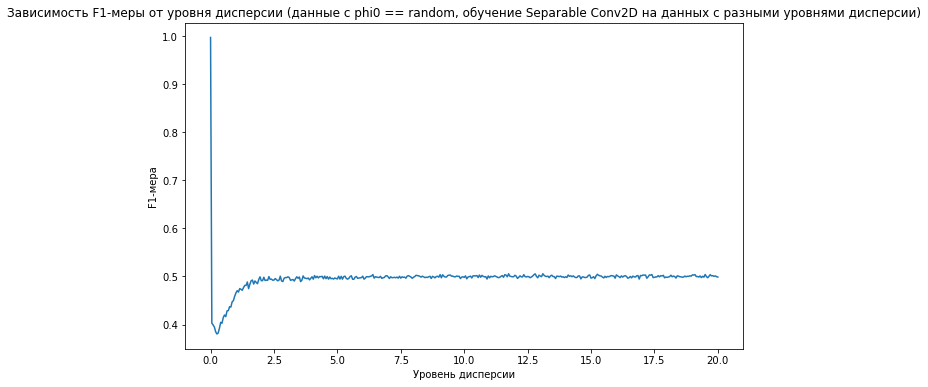

In [132]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_random_all_sep_conv2d.keys()), list(f1_dict_phi0_random_all_sep_conv2d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение Separable Conv2D на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')

In [133]:
df15['disp_db'] = 10 * np.log10(df15['disp'])
df15.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,y_true,y_pred,disp,disp_db
0,0,0,0.0,-inf
1,0,0,0.0,-inf
2,0,0,0.0,-inf
3,0,0,0.0,-inf
4,0,0,0.0,-inf


Text(0, 0.5, 'F1-мера')

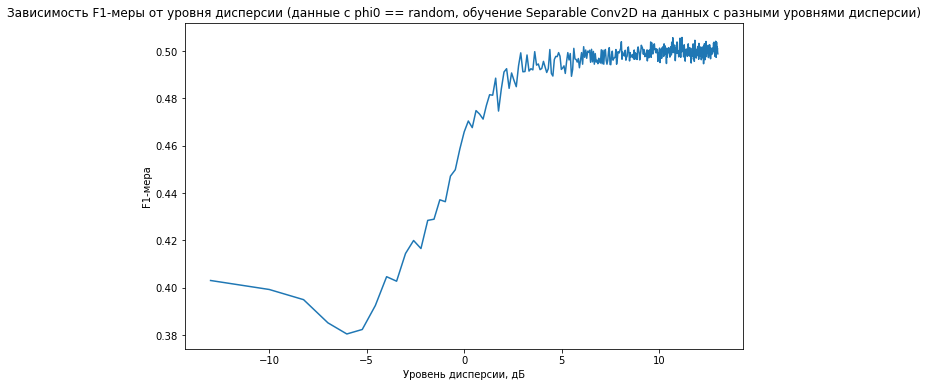

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(list(df15['disp_db'].unique()), list(f1_dict_phi0_random_all_sep_conv2d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение Separable Conv2D на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')

In [135]:
# fitting on data with dispersia == 0

history16 = model4.fit(
    x=X_train_phi0_random[dispersia_train_phi0_random == 0], y=Y_train_phi0_random_cat[dispersia_train_phi0_random == 0],
    batch_size=256,
    epochs=4,
    shuffle=True,
    verbose=1,
    initial_epoch=0
) 

Epoch 1/4
15743/15743 [==============================] - 52s 3ms/step - loss: 0.0040 - accuracy: 0.9975
Epoch 2/4
15743/15743 [==============================] - 51s 3ms/step - loss: 0.0036 - accuracy: 0.9976
Epoch 3/4
15743/15743 [==============================] - 51s 3ms/step - loss: 0.0034 - accuracy: 0.9979
Epoch 4/4
15743/15743 [==============================] - 50s 3ms/step - loss: 0.0032 - accuracy: 0.9983


In [136]:
pred16 = model4.predict_classes(X_test_phi0_random)
df16 = pd.DataFrame(columns=['y_true', 'y_pred', 'disp'])
df16['y_true'] = Y_test_phi0_random.T[0]
df16['y_pred'] = pred16
df16['disp'] = dispersia_test_phi0_random
df16.head()

,y_true,y_pred,disp
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0


In [137]:
f1_dict_phi0_random_disp_0_sep_conv2d = dict()
for s in df16['disp'].unique():
    df = df16[df16['disp'] == s]
    f1_dict_phi0_random_disp_0_sep_conv2d[s] = f1_score(df['y_true'].values, df['y_pred'].values, average='micro')

Text(0, 0.5, 'F1-мера')

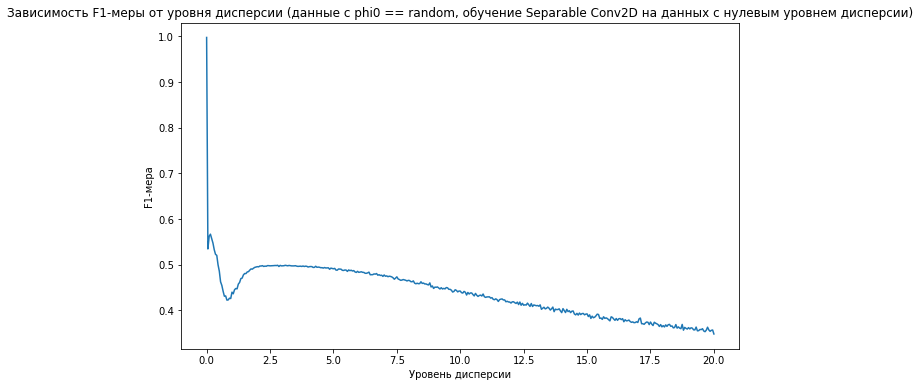

In [138]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_random_disp_0_sep_conv2d.keys()), list(f1_dict_phi0_random_disp_0_sep_conv2d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение Separable Conv2D на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')

In [139]:
df16['disp_db'] = 10 * np.log10(df16['disp'])
df16.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,y_true,y_pred,disp,disp_db
0,0,0,0.0,-inf
1,0,0,0.0,-inf
2,0,0,0.0,-inf
3,0,0,0.0,-inf
4,0,0,0.0,-inf


Text(0, 0.5, 'F1-мера')

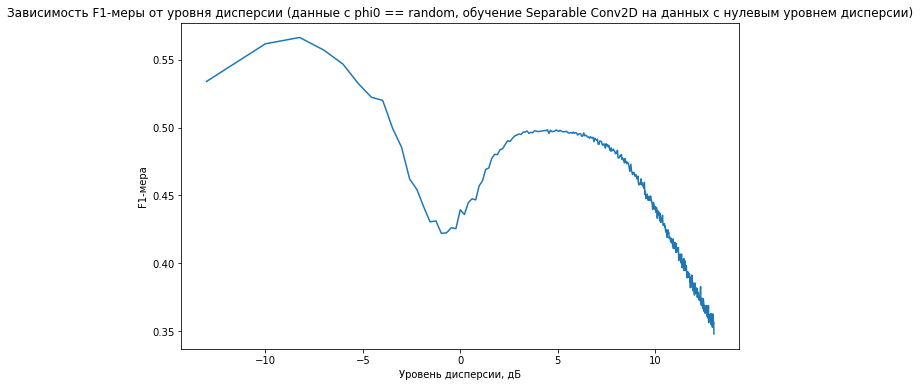

In [140]:
plt.figure(figsize=(10, 6))
plt.plot(list(df16['disp_db'].unique()), list(f1_dict_phi0_random_disp_0_sep_conv2d.values()))
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение Separable Conv2D на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')

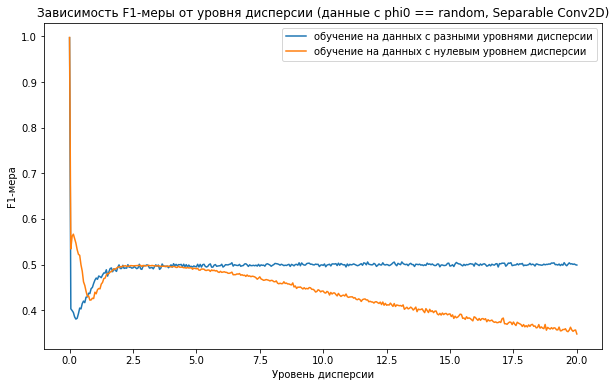

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(list(f1_dict_phi0_random_all_sep_conv2d.keys()), list(f1_dict_phi0_random_all_sep_conv2d.values()), label='обучение на данных с разными уровнями дисперсии')
plt.plot(list(df15['disp'].unique()), list(f1_dict_phi0_random_disp_0_sep_conv2d.values()), label='обучение на данных с нулевым уровнем дисперсии')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, Separable Conv2D)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')
plt.legend()

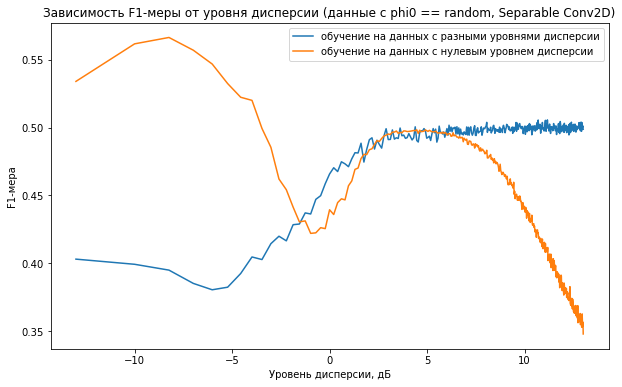

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(list(df15['disp_db'].unique()), list(f1_dict_phi0_random_all_sep_conv2d.values()), label='обучение на данных с разными уровнями дисперсии')
plt.plot(list(df16['disp_db'].unique()), list(f1_dict_phi0_random_disp_0_sep_conv2d.values()), label='обучение на данных с нулевым уровнем дисперсии')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, Separable Conv2D)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')
plt.legend()

# Analysis

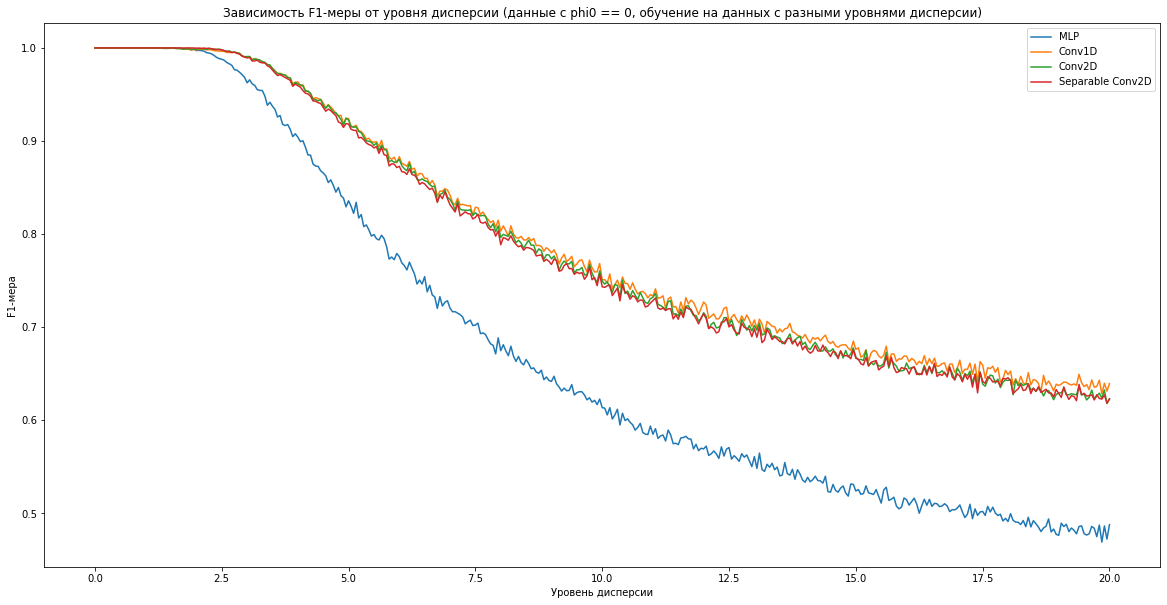

In [152]:
plt.figure(figsize=(20, 10))
plt.plot(list(f1_dict_phi0_0_all.keys()), list(f1_dict_phi0_0_all.values()), label='MLP')
plt.plot(list(f1_dict_phi0_0_all_conv1d.keys()), list(f1_dict_phi0_0_all_conv1d.values()), label='Conv1D')
plt.plot(list(f1_dict_phi0_0_all_conv2d.keys()), list(f1_dict_phi0_0_all_conv2d.values()), label='Conv2D')
plt.plot(list(f1_dict_phi0_0_all_sep_conv2d.keys()), list(f1_dict_phi0_0_all_sep_conv2d.values()), label='Separable Conv2D')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')
plt.legend()

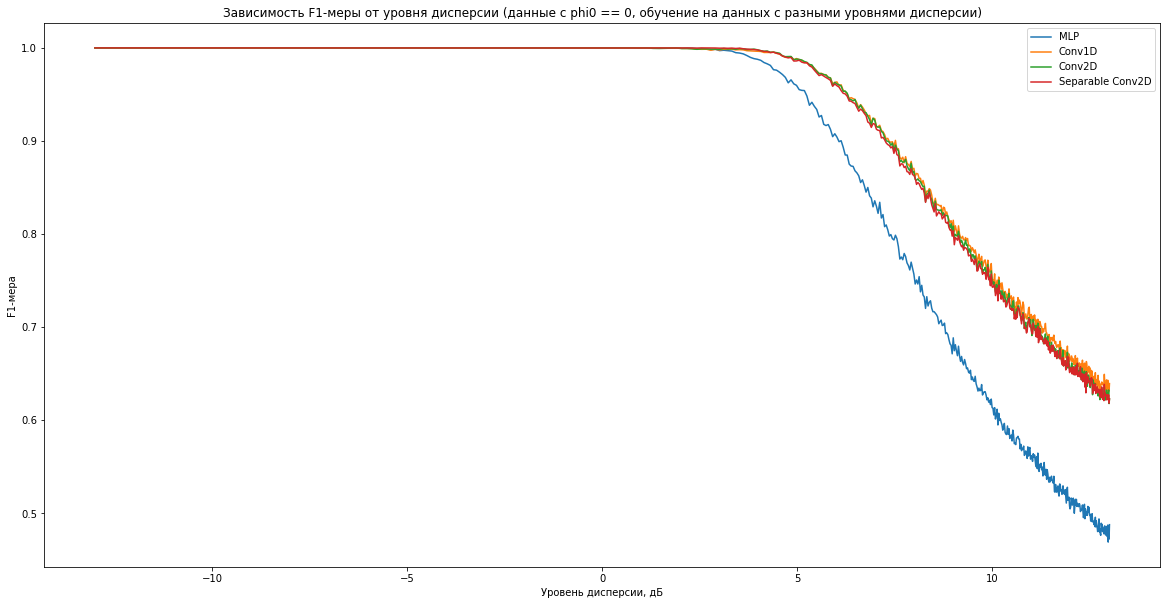

In [153]:
plt.figure(figsize=(20, 10))
plt.plot(list(df1['disp_db'].unique()), list(f1_dict_phi0_0_all.values()), label='MLP')
plt.plot(list(df5['disp_db'].unique()), list(f1_dict_phi0_0_all_conv1d.values()), label='Conv1D')
plt.plot(list(df9['disp_db'].unique()), list(f1_dict_phi0_0_all_conv2d.values()), label='Conv2D')
plt.plot(list(df13['disp_db'].unique()), list(f1_dict_phi0_0_all_sep_conv2d.values()), label='Separable Conv2D')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')
plt.legend()

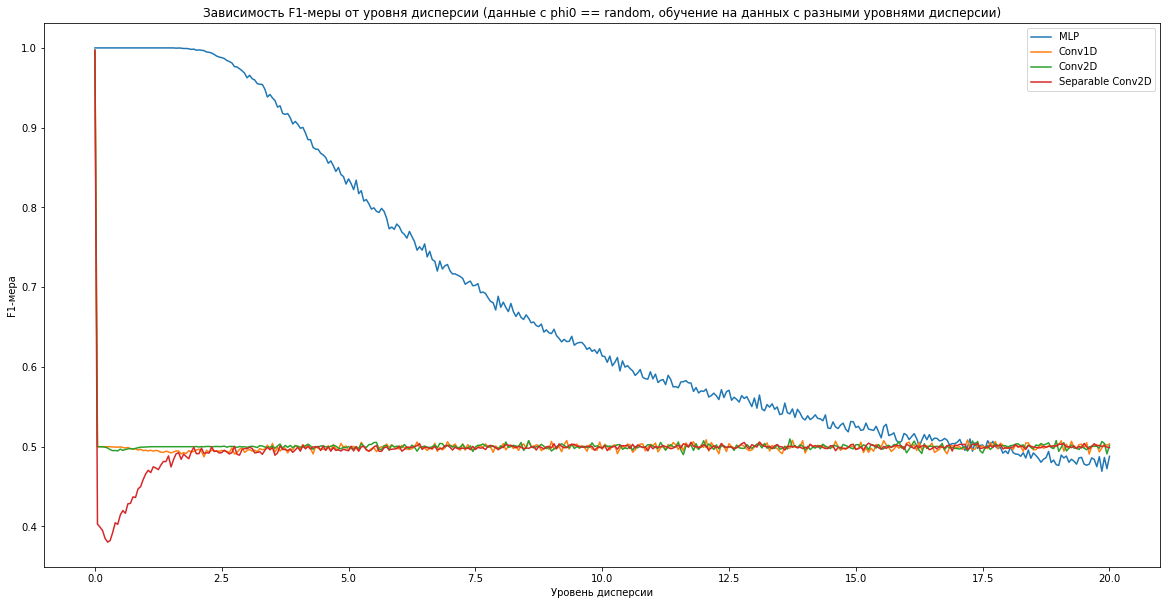

In [154]:
plt.figure(figsize=(20, 10))
plt.plot(list(f1_dict_phi0_random_all.keys()), list(f1_dict_phi0_random_all.values()), label='MLP')
plt.plot(list(f1_dict_phi0_random_all_conv1d.keys()), list(f1_dict_phi0_random_all_conv1d.values()), label='Conv1D')
plt.plot(list(f1_dict_phi0_random_all_conv2d.keys()), list(f1_dict_phi0_random_all_conv2d.values()), label='Conv2D')
plt.plot(list(f1_dict_phi0_random_all_sep_conv2d.keys()), list(f1_dict_phi0_random_all_sep_conv2d.values()), label='Separable Conv2D')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')
plt.legend()

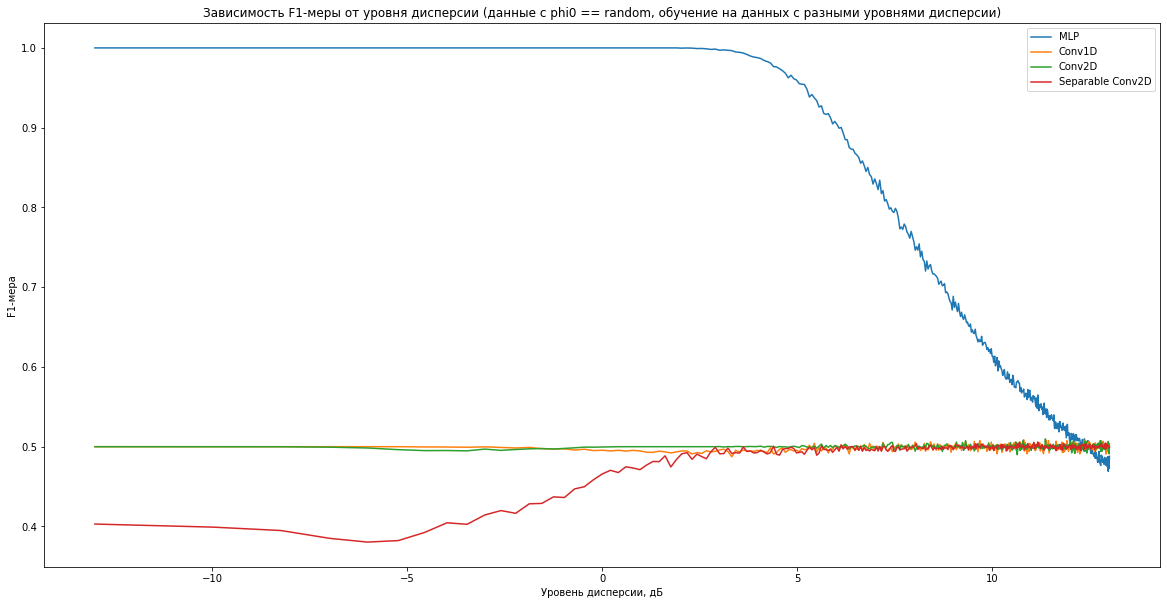

In [155]:
plt.figure(figsize=(20, 10))
plt.plot(list(df3['disp_db'].unique()), list(f1_dict_phi0_random_all.values()), label='MLP')
plt.plot(list(df7['disp_db'].unique()), list(f1_dict_phi0_random_all_conv1d.values()), label='Conv1D')
plt.plot(list(df11['disp_db'].unique()), list(f1_dict_phi0_random_all_conv2d.values()), label='Conv2D')
plt.plot(list(df15['disp_db'].unique()), list(f1_dict_phi0_random_all_sep_conv2d.values()), label='Separable Conv2D')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')
plt.legend()

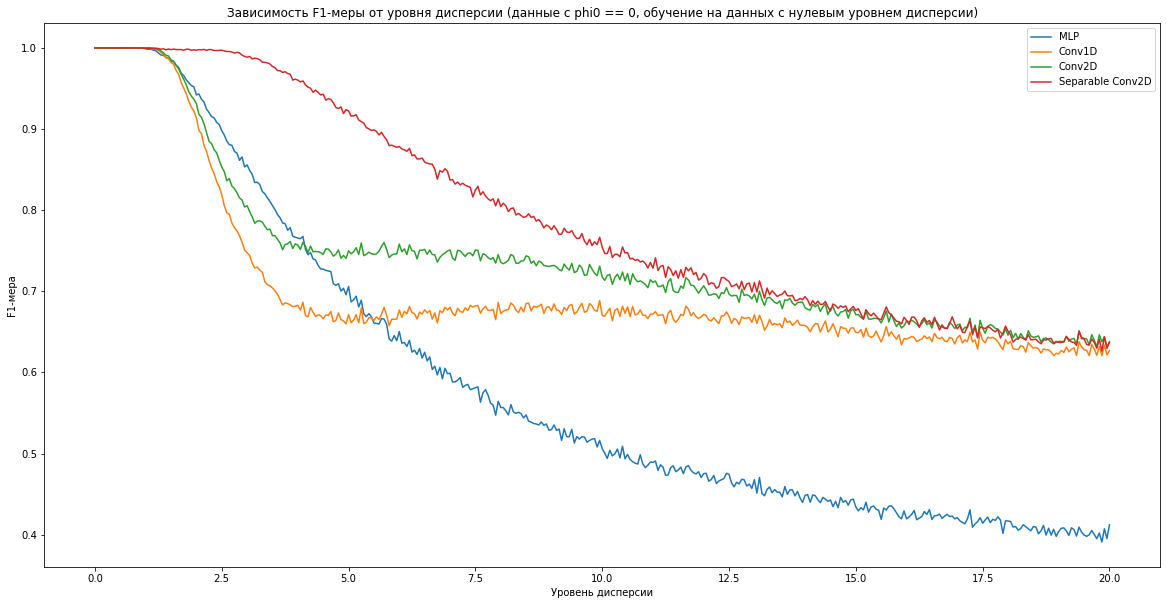

In [156]:
plt.figure(figsize=(20, 10))
plt.plot(list(f1_dict_phi0_0_disp_0.keys()), list(f1_dict_phi0_0_disp_0.values()), label='MLP')
plt.plot(list(f1_dict_phi0_0_disp_0_conv1d.keys()), list(f1_dict_phi0_0_disp_0_conv1d.values()), label='Conv1D')
plt.plot(list(f1_dict_phi0_0_disp_0_conv2d.keys()), list(f1_dict_phi0_0_disp_0_conv2d.values()), label='Conv2D')
plt.plot(list(f1_dict_phi0_0_disp_0_sep_conv2d.keys()), list(f1_dict_phi0_0_disp_0_sep_conv2d.values()), label='Separable Conv2D')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')
plt.legend()

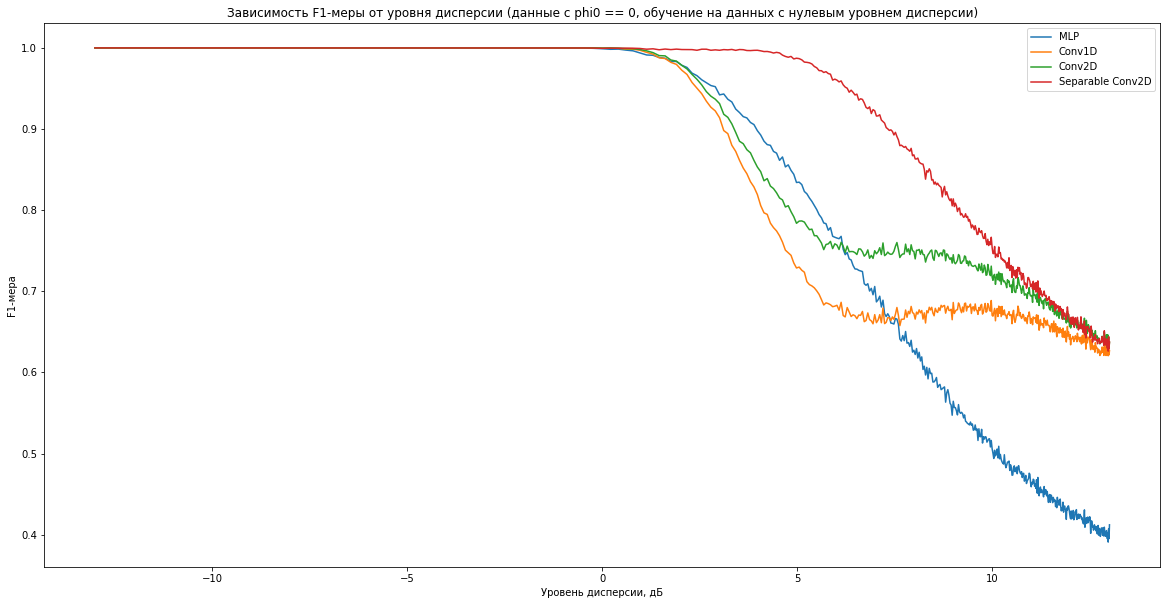

In [157]:
plt.figure(figsize=(20, 10))
plt.plot(list(df2['disp_db'].unique()), list(f1_dict_phi0_0_disp_0.values()), label='MLP')
plt.plot(list(df6['disp_db'].unique()), list(f1_dict_phi0_0_disp_0_conv1d.values()), label='Conv1D')
plt.plot(list(df10['disp_db'].unique()), list(f1_dict_phi0_0_disp_0_conv2d.values()), label='Conv2D')
plt.plot(list(df14['disp_db'].unique()), list(f1_dict_phi0_0_disp_0_sep_conv2d.values()), label='Separable Conv2D')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')
plt.legend()

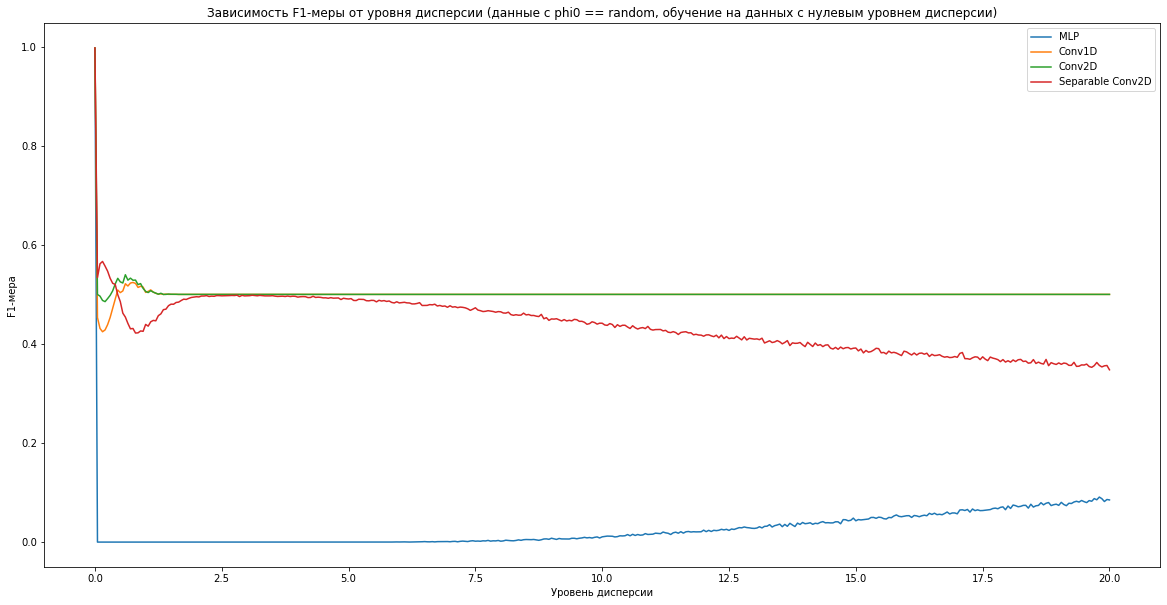

In [158]:
plt.figure(figsize=(20, 10))
plt.plot(list(f1_dict_phi0_random_disp_0.keys()), list(f1_dict_phi0_random_disp_0.values()), label='MLP')
plt.plot(list(f1_dict_phi0_random_disp_0_conv1d.keys()), list(f1_dict_phi0_random_disp_0_conv1d.values()), label='Conv1D')
plt.plot(list(f1_dict_phi0_random_disp_0_conv2d.keys()), list(f1_dict_phi0_random_disp_0_conv2d.values()), label='Conv2D')
plt.plot(list(f1_dict_phi0_random_disp_0_sep_conv2d.keys()), list(f1_dict_phi0_random_disp_0_sep_conv2d.values()), label='Separable Conv2D')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')
plt.legend()

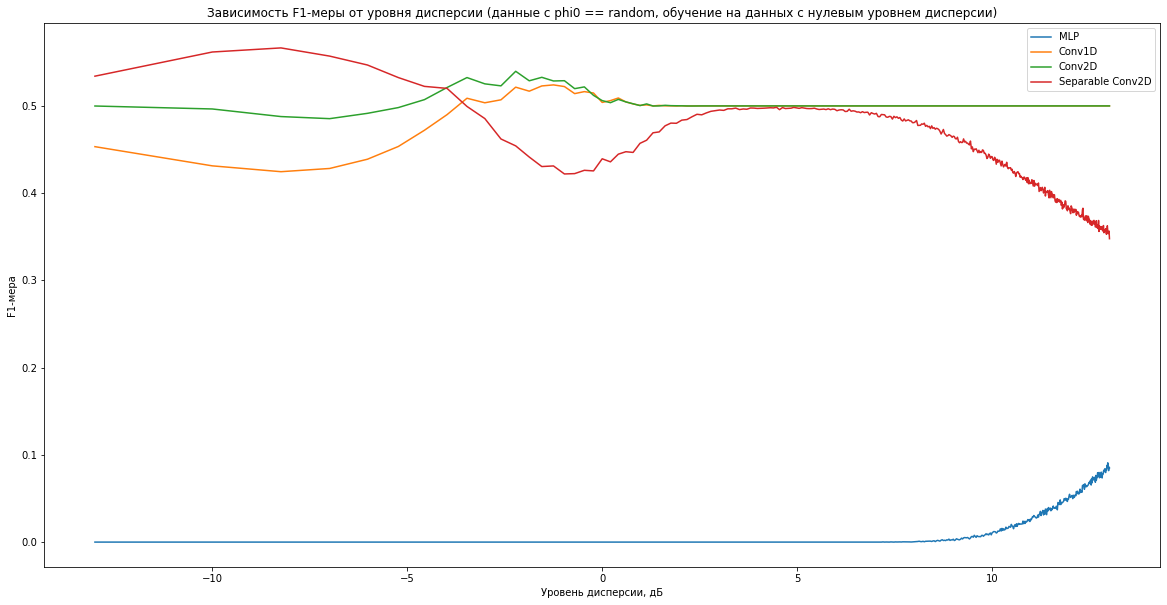

In [159]:
plt.figure(figsize=(20, 10))
plt.plot(list(df4['disp_db'].unique()), list(f1_dict_phi0_random_disp_0.values()), label='MLP')
plt.plot(list(df8['disp_db'].unique()), list(f1_dict_phi0_random_disp_0_conv1d.values()), label='Conv1D')
plt.plot(list(df12['disp_db'].unique()), list(f1_dict_phi0_random_disp_0_conv2d.values()), label='Conv2D')
plt.plot(list(df16['disp_db'].unique()), list(f1_dict_phi0_random_disp_0_sep_conv2d.values()), label='Separable Conv2D')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')
plt.legend()

### Построим аналогичные графики, только scatter plot

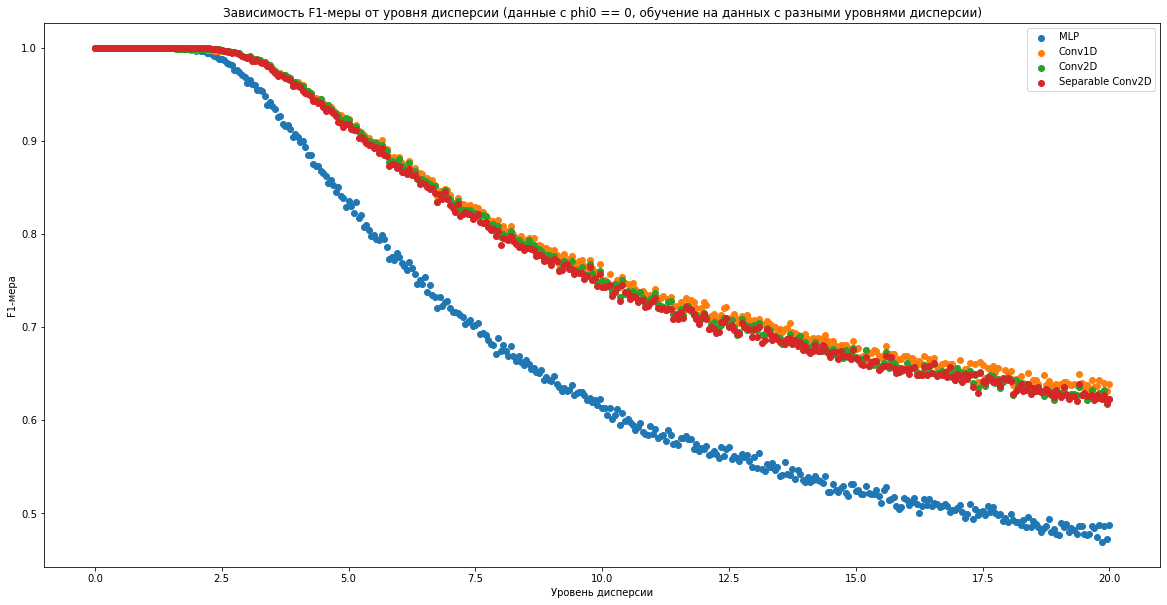

In [160]:
plt.figure(figsize=(20, 10))
plt.scatter(list(f1_dict_phi0_0_all.keys()), list(f1_dict_phi0_0_all.values()), label='MLP')
plt.scatter(list(f1_dict_phi0_0_all_conv1d.keys()), list(f1_dict_phi0_0_all_conv1d.values()), label='Conv1D')
plt.scatter(list(f1_dict_phi0_0_all_conv2d.keys()), list(f1_dict_phi0_0_all_conv2d.values()), label='Conv2D')
plt.scatter(list(f1_dict_phi0_0_all_sep_conv2d.keys()), list(f1_dict_phi0_0_all_sep_conv2d.values()), label='Separable Conv2D')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')
plt.legend()

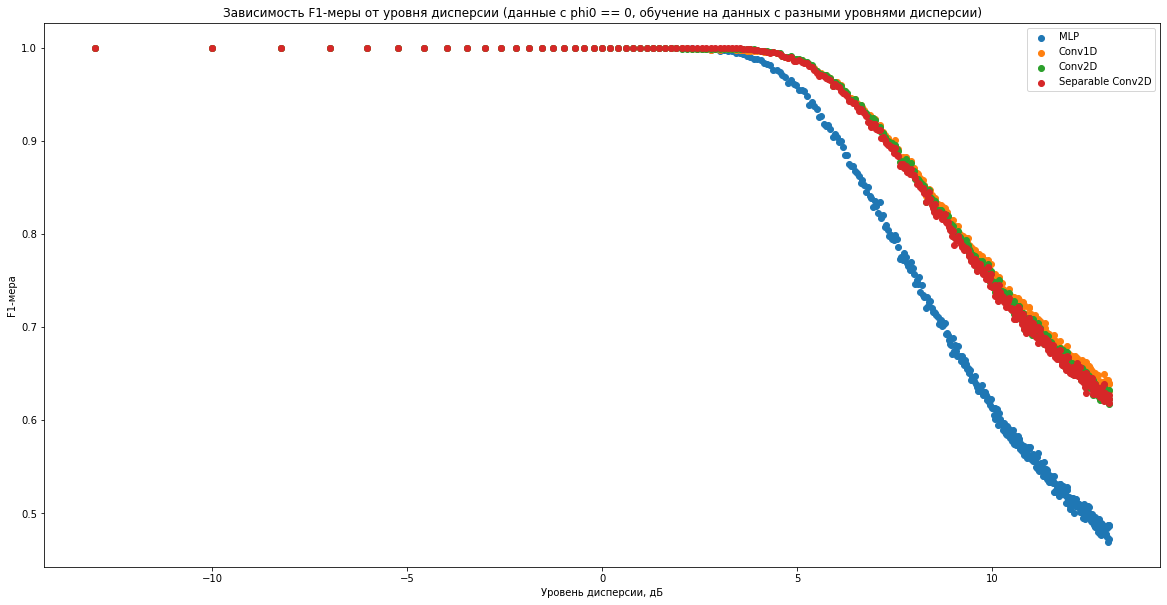

In [161]:
plt.figure(figsize=(20, 10))
plt.scatter(list(df1['disp_db'].unique()), list(f1_dict_phi0_0_all.values()), label='MLP')
plt.scatter(list(df5['disp_db'].unique()), list(f1_dict_phi0_0_all_conv1d.values()), label='Conv1D')
plt.scatter(list(df9['disp_db'].unique()), list(f1_dict_phi0_0_all_conv2d.values()), label='Conv2D')
plt.scatter(list(df13['disp_db'].unique()), list(f1_dict_phi0_0_all_sep_conv2d.values()), label='Separable Conv2D')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')
plt.legend()

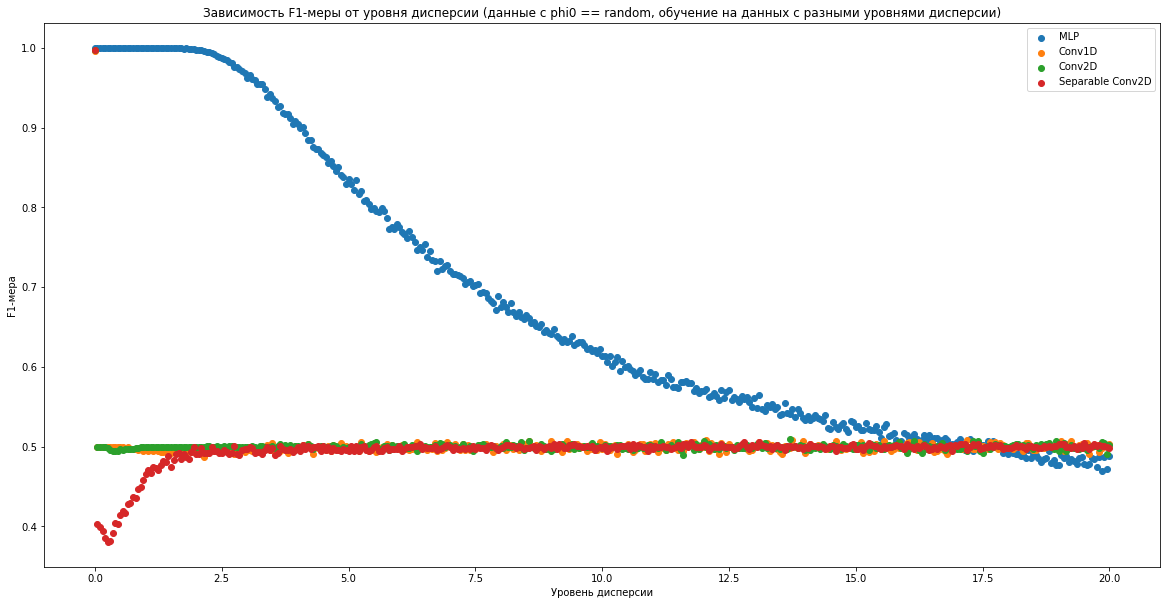

In [162]:
plt.figure(figsize=(20, 10))
plt.scatter(list(f1_dict_phi0_random_all.keys()), list(f1_dict_phi0_random_all.values()), label='MLP')
plt.scatter(list(f1_dict_phi0_random_all_conv1d.keys()), list(f1_dict_phi0_random_all_conv1d.values()), label='Conv1D')
plt.scatter(list(f1_dict_phi0_random_all_conv2d.keys()), list(f1_dict_phi0_random_all_conv2d.values()), label='Conv2D')
plt.scatter(list(f1_dict_phi0_random_all_sep_conv2d.keys()), list(f1_dict_phi0_random_all_sep_conv2d.values()), label='Separable Conv2D')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')
plt.legend()

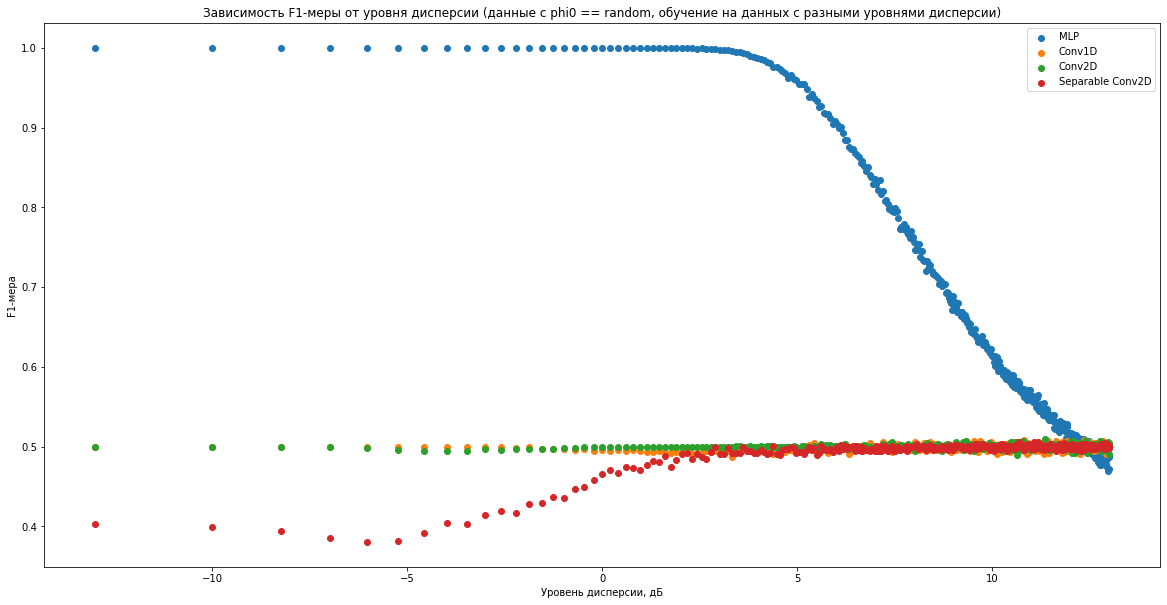

In [163]:
plt.figure(figsize=(20, 10))
plt.scatter(list(df3['disp_db'].unique()), list(f1_dict_phi0_random_all.values()), label='MLP')
plt.scatter(list(df7['disp_db'].unique()), list(f1_dict_phi0_random_all_conv1d.values()), label='Conv1D')
plt.scatter(list(df11['disp_db'].unique()), list(f1_dict_phi0_random_all_conv2d.values()), label='Conv2D')
plt.scatter(list(df15['disp_db'].unique()), list(f1_dict_phi0_random_all_sep_conv2d.values()), label='Separable Conv2D')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение на данных с разными уровнями дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')
plt.legend()

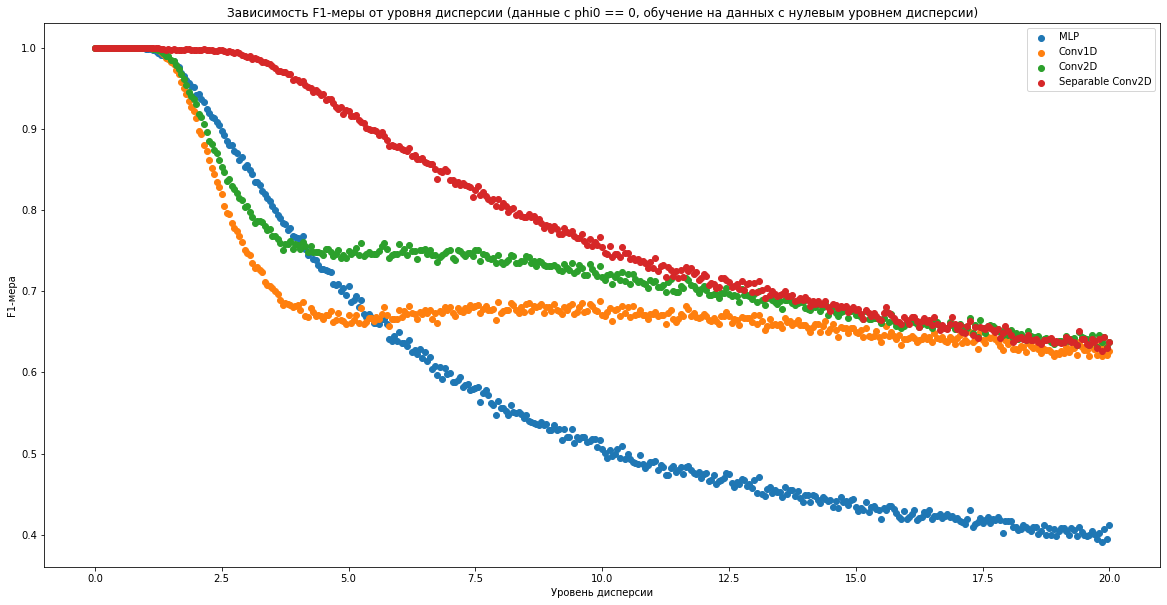

In [164]:
plt.figure(figsize=(20, 10))
plt.scatter(list(f1_dict_phi0_0_disp_0.keys()), list(f1_dict_phi0_0_disp_0.values()), label='MLP')
plt.scatter(list(f1_dict_phi0_0_disp_0_conv1d.keys()), list(f1_dict_phi0_0_disp_0_conv1d.values()), label='Conv1D')
plt.scatter(list(f1_dict_phi0_0_disp_0_conv2d.keys()), list(f1_dict_phi0_0_disp_0_conv2d.values()), label='Conv2D')
plt.scatter(list(f1_dict_phi0_0_disp_0_sep_conv2d.keys()), list(f1_dict_phi0_0_disp_0_sep_conv2d.values()), label='Separable Conv2D')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')
plt.legend()

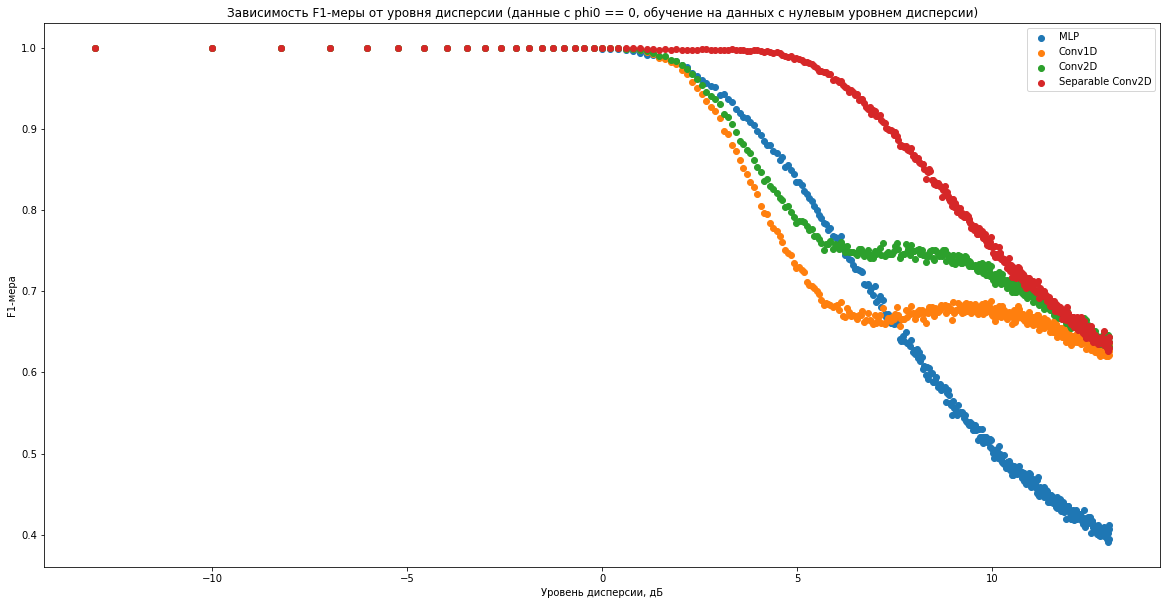

In [165]:
plt.figure(figsize=(20, 10))
plt.scatter(list(df2['disp_db'].unique()), list(f1_dict_phi0_0_disp_0.values()), label='MLP')
plt.scatter(list(df6['disp_db'].unique()), list(f1_dict_phi0_0_disp_0_conv1d.values()), label='Conv1D')
plt.scatter(list(df10['disp_db'].unique()), list(f1_dict_phi0_0_disp_0_conv2d.values()), label='Conv2D')
plt.scatter(list(df14['disp_db'].unique()), list(f1_dict_phi0_0_disp_0_sep_conv2d.values()), label='Separable Conv2D')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == 0, обучение на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')
plt.legend()

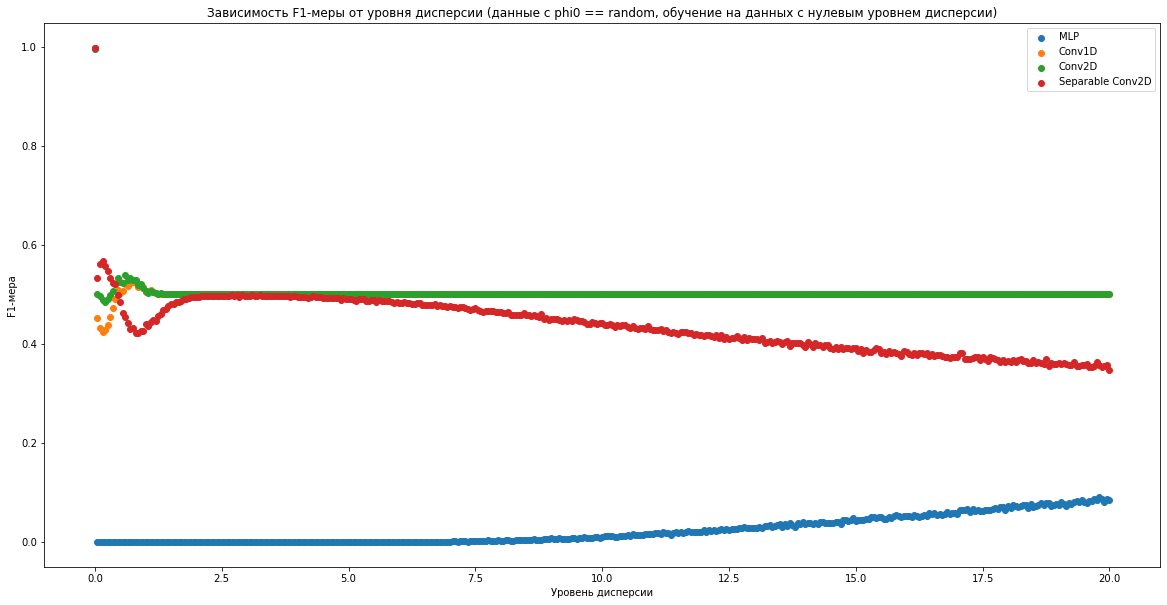

In [166]:
plt.figure(figsize=(20, 10))
plt.scatter(list(f1_dict_phi0_random_disp_0.keys()), list(f1_dict_phi0_random_disp_0.values()), label='MLP')
plt.scatter(list(f1_dict_phi0_random_disp_0_conv1d.keys()), list(f1_dict_phi0_random_disp_0_conv1d.values()), label='Conv1D')
plt.scatter(list(f1_dict_phi0_random_disp_0_conv2d.keys()), list(f1_dict_phi0_random_disp_0_conv2d.values()), label='Conv2D')
plt.scatter(list(f1_dict_phi0_random_disp_0_sep_conv2d.keys()), list(f1_dict_phi0_random_disp_0_sep_conv2d.values()), label='Separable Conv2D')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии')
plt.ylabel('F1-мера')
plt.legend()

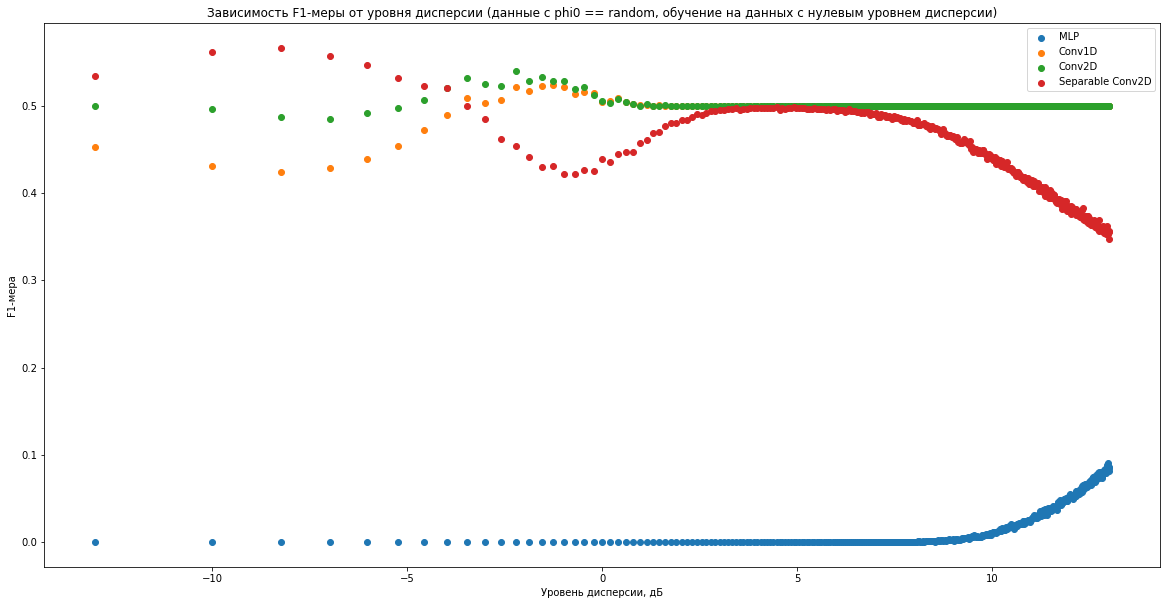

In [167]:
plt.figure(figsize=(20, 10))
plt.scatter(list(df4['disp_db'].unique()), list(f1_dict_phi0_random_disp_0.values()), label='MLP')
plt.scatter(list(df8['disp_db'].unique()), list(f1_dict_phi0_random_disp_0_conv1d.values()), label='Conv1D')
plt.scatter(list(df12['disp_db'].unique()), list(f1_dict_phi0_random_disp_0_conv2d.values()), label='Conv2D')
plt.scatter(list(df16['disp_db'].unique()), list(f1_dict_phi0_random_disp_0_sep_conv2d.values()), label='Separable Conv2D')
plt.title('Зависимость F1-меры от уровня дисперсии (данные с phi0 == random, обучение на данных с нулевым уровнем дисперсии)')
plt.xlabel('Уровень дисперсии, дБ')
plt.ylabel('F1-мера')
plt.legend()